In [5]:
import pandas as pd
import json
import os
from pathlib import Path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Load your data
all_data_df = pd.read_excel('/Users/eveyhuang/Documents/NICO/gemini_code/data/all_data_df_sm.xlsx')
all_data_df['percent_time_screenshare'] = all_data_df['percent_time_screenshare']*0.01

### Summary statistics and vis


SUMMARY STATISTICS BY CONFERENCE

NUM TEAMS:
----------------------------------------
            count  mean   std  min  max
conference                             
2020NES        16  1.94  0.85    0    3
2021ABI        25  1.40  1.12    0    3
2021CMC        21  1.52  0.98    0    3
2021MND        24  1.08  1.02    0    3
2021MZT        15  1.80  1.86    0    8
2021NES        18  1.72  1.36    0    4
2021SLU        20  1.55  0.94    0    3
2022MND        18  1.11  1.08    0    3

NUM FUNDED TEAMS:
----------------------------------------
            count  mean   std  min  max
conference                             
2020NES        16  0.62  0.72    0    2
2021ABI        25  0.44  0.58    0    2
2021CMC        21  0.67  0.73    0    2
2021MND        24  0.21  0.41    0    1
2021MZT        15  0.93  1.33    0    5
2021NES        18  0.61  0.61    0    2
2021SLU        20  0.60  0.68    0    2
2022MND        18  0.33  0.49    0    1

MEETING LENGTH:
------------------------------------

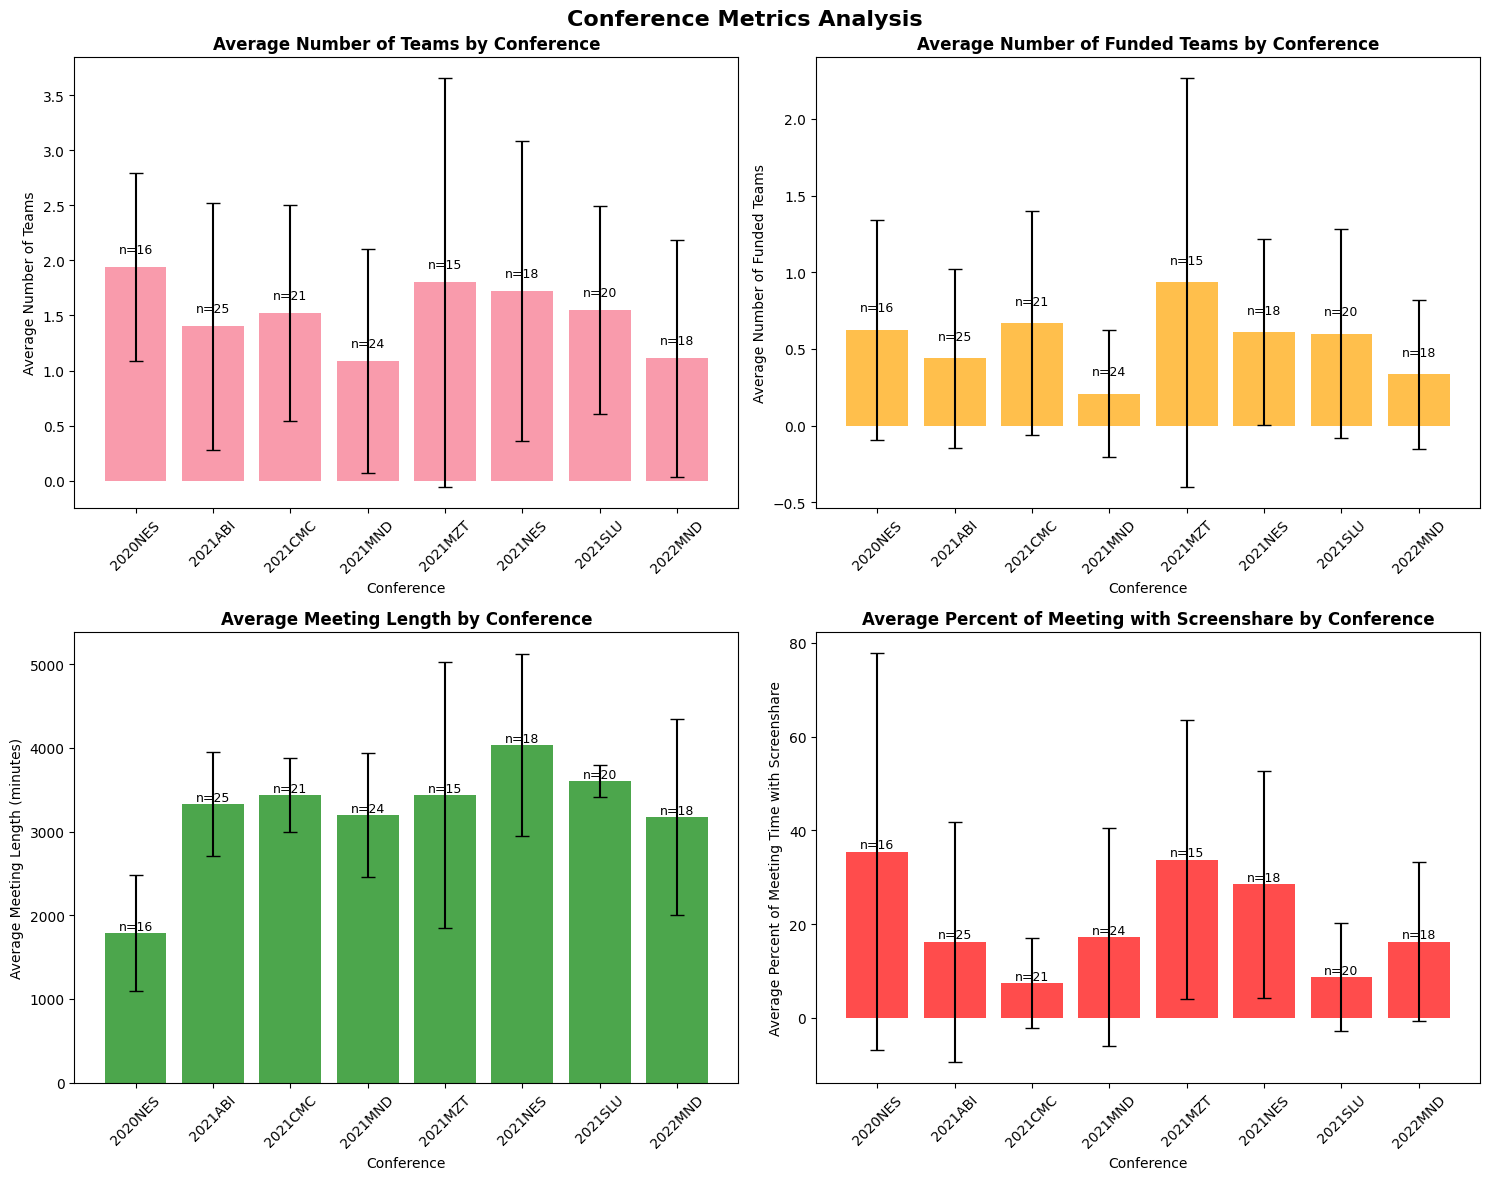

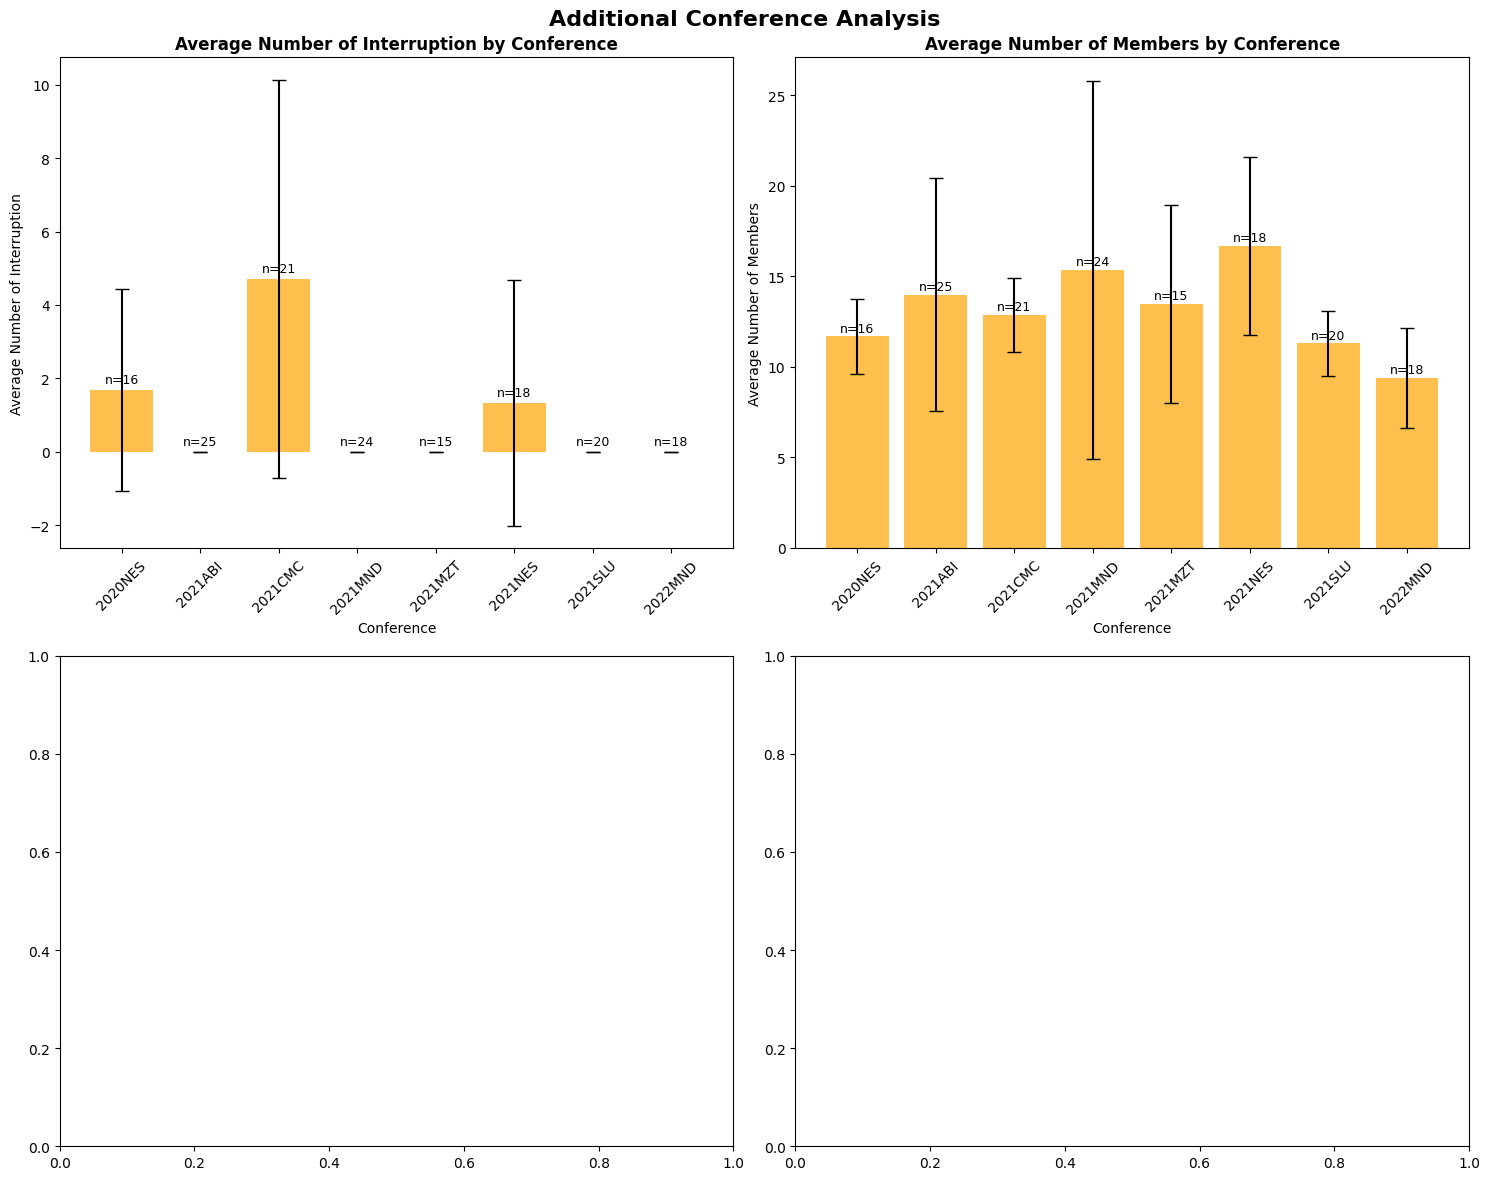

In [3]:
import seaborn as sns
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt


def create_conference_visualizations(df):
    """Create visualizations for conference metrics"""
    
    # Set up the plotting style
    plt.style.use('default')
    sns.set_palette("husl")
    
    # Create a figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Conference Metrics Analysis', fontsize=16, fontweight='bold')
    
    # 1. Number of Teams by Conference
    ax1 = axes[0, 0]
    if 'num_teams' in df.columns and 'conference' in df.columns:
        team_counts = df.groupby('conference')['num_teams'].agg(['mean', 'std', 'count']).reset_index()
        
        bars = ax1.bar(team_counts['conference'], team_counts['mean'], 
                      yerr=team_counts['std'], capsize=5, alpha=0.7)
        ax1.set_title('Average Number of Teams by Conference', fontweight='bold')
        ax1.set_xlabel('Conference')
        ax1.set_ylabel('Average Number of Teams')
        ax1.tick_params(axis='x', rotation=45)
        
        # Add count labels on bars
        for i, (bar, count) in enumerate(zip(bars, team_counts['count'])):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'n={count}', ha='center', va='bottom', fontsize=9)
    else:
        ax1.text(0.5, 0.5, 'num_teams or conference column not found', 
                ha='center', va='center', transform=ax1.transAxes)
        ax1.set_title('Number of Teams by Conference')
    
    # 2. Number of Funded Teams by Conference
    ax2 = axes[0, 1]
    if 'num_funded_teams' in df.columns and 'conference' in df.columns:
        funded_counts = df.groupby('conference')['num_funded_teams'].agg(['mean', 'std', 'count']).reset_index()
        
        bars = ax2.bar(funded_counts['conference'], funded_counts['mean'], 
                      yerr=funded_counts['std'], capsize=5, alpha=0.7, color='orange')
        ax2.set_title('Average Number of Funded Teams by Conference', fontweight='bold')
        ax2.set_xlabel('Conference')
        ax2.set_ylabel('Average Number of Funded Teams')
        ax2.tick_params(axis='x', rotation=45)
        
        # Add count labels on bars
        for i, (bar, count) in enumerate(zip(bars, funded_counts['count'])):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'n={count}', ha='center', va='bottom', fontsize=9)
    else:
        ax2.text(0.5, 0.5, 'num_funded_teams or conference column not found', 
                ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Number of Funded Teams by Conference')
    
    # 3. Meeting Length by Conference
    ax3 = axes[1, 0]
    if 'meeting_length' in df.columns and 'conference' in df.columns:
        # Convert meeting_length to numeric if it's not already
        df['meeting_length_numeric'] = pd.to_numeric(df['meeting_length'], errors='coerce')
        
        meeting_stats = df.groupby('conference')['meeting_length_numeric'].agg(['mean', 'std', 'count']).reset_index()
        
        bars = ax3.bar(meeting_stats['conference'], meeting_stats['mean'], 
                      yerr=meeting_stats['std'], capsize=5, alpha=0.7, color='green')
        ax3.set_title('Average Meeting Length by Conference', fontweight='bold')
        ax3.set_xlabel('Conference')
        ax3.set_ylabel('Average Meeting Length (minutes)')
        ax3.tick_params(axis='x', rotation=45)
        
        # Add count labels on bars
        for i, (bar, count) in enumerate(zip(bars, meeting_stats['count'])):
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'n={count}', ha='center', va='bottom', fontsize=9)
    else:
        ax3.text(0.5, 0.5, 'meeting_length or conference column not found', 
                ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Meeting Length by Conference')
    
    # 4. Time Screenshare by Conference
    ax4 = axes[1, 1]
    if 'percent_time_screenshare' in df.columns and 'conference' in df.columns:
        # Convert time_screenshare to numeric if it's not already
        df['percent_time_screenshare_numeric'] = pd.to_numeric(df['percent_time_screenshare'], errors='coerce')
        
        screenshare_stats = df.groupby('conference')['percent_time_screenshare_numeric'].agg(['mean', 'std', 'count']).reset_index()
        
        bars = ax4.bar(screenshare_stats['conference'], screenshare_stats['mean'], 
                      yerr=screenshare_stats['std'], capsize=5, alpha=0.7, color='red')
        ax4.set_title('Average Percent of Meeting with Screenshare by Conference', fontweight='bold')
        ax4.set_xlabel('Conference')
        ax4.set_ylabel('Average Percent of Meeting Time with Screenshare')
        ax4.tick_params(axis='x', rotation=45)
        
        # Add count labels on bars
        for i, (bar, count) in enumerate(zip(bars, screenshare_stats['count'])):
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'n={count}', ha='center', va='bottom', fontsize=9)
    else:
        ax4.text(0.5, 0.5, 'time_screenshare or conference column not found', 
                ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('Screenshare Time by Conference')
    
    plt.tight_layout()
    return fig

def create_additional_visualizations(df):
    """Create additional visualizations for deeper analysis"""
    
    if 'conference' not in df.columns:
        print("No conference column found for additional visualizations")
        return
    
    # Create a figure with subplots for additional analysis
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Additional Conference Analysis', fontsize=16, fontweight='bold')
    
    # 1. Box plots for all metrics
    ax1 = axes[0, 0]
    if 'num_interruption' in df.columns and 'conference' in df.columns:
        interuption_counts = df.groupby('conference')['num_interruption'].agg(['mean', 'std', 'count']).reset_index()
        
        bars = ax1.bar(interuption_counts['conference'], interuption_counts['mean'], 
                    yerr=interuption_counts['std'], capsize=5, alpha=0.7, color='orange')
        ax1.set_title('Average Number of Interruption by Conference', fontweight='bold')
        ax1.set_xlabel('Conference')
        ax1.set_ylabel('Average Number of Interruption')
        ax1.tick_params(axis='x', rotation=45)
        
        # Add count labels on bars
        for i, (bar, count) in enumerate(zip(bars, interuption_counts['count'])):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'n={count}', ha='center', va='bottom', fontsize=9)
    else:
        ax1.text(0.5, 0.5, 'num_interruption or conference column not found', 
                ha='center', va='center', transform=ax1.transAxes)
        ax1.set_title('Number of Interuption by Conference')
        
    plt.tight_layout()
    
    
    # 2. Average Number of Members by Conference
    ax2 = axes[0, 1]
    if 'num_members' in df.columns and 'conference' in df.columns:
        member_counts = df.groupby('conference')['num_members'].agg(['mean', 'std', 'count']).reset_index()
        
        bars = ax2.bar(member_counts['conference'], member_counts['mean'], 
                    yerr=member_counts['std'], capsize=5, alpha=0.7, color='orange')
        ax2.set_title('Average Number of Members by Conference', fontweight='bold')
        ax2.set_xlabel('Conference')
        ax2.set_ylabel('Average Number of Members')
        ax2.tick_params(axis='x', rotation=45)
        
        # Add count labels on bars
        for i, (bar, count) in enumerate(zip(bars, member_counts['count'])):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'n={count}', ha='center', va='bottom', fontsize=9)
    else:
        ax2.text(0.5, 0.5, 'num_members or conference column not found', 
                ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Number of Members by Conference')
        
    plt.tight_layout()
    return fig

def print_summary_statistics(df):
    """Print summary statistics for each conference"""
    if 'conference' not in df.columns:
        print("No conference column found")
        return
    
    print("\n" + "="*60)
    print("SUMMARY STATISTICS BY CONFERENCE")
    print("="*60)
    
    metrics = ['num_teams', 'num_funded_teams', 'meeting_length', 'percent_time_screenshare', 'num_members']
    available_metrics = [m for m in metrics if m in df.columns]
    
    for metric in available_metrics:
        print(f"\n{metric.upper().replace('_', ' ')}:")
        print("-" * 40)
        
        # Convert to numeric
        df[metric + '_numeric'] = pd.to_numeric(df[metric], errors='coerce')
        
        summary = df.groupby('conference')[metric + '_numeric'].agg([
            'count', 'mean', 'std', 'min', 'max'
        ]).round(2)
        
        print(summary)
    
    print("\n" + "="*60)



df = all_data_df

    
# Print summary statistics
print_summary_statistics(df)

# Create visualizations
print("\nCreating visualizations...")

# Main metrics visualization
fig1 = create_conference_visualizations(df)
# fig1.savefig('conference_metrics_main.png', dpi=300, bbox_inches='tight')
# print("Saved: conference_metrics_main.png")

# Additional analysis visualization
fig2 = create_additional_visualizations(df)
# fig2.savefig('conference_metrics_additional.png', dpi=300, bbox_inches='tight')
# print("Saved: conference_metrics_additional.png")

# Show plots
plt.show()
    

In [33]:


# Columns to exclude
exclude = ['conference', 'session', 'num_teams', 'num_funded_teams', 'meeting_length', 'time_screenshare', 'has_teams', 'has_funded_teams']

# Select feature columns
feature_cols = [col for col in all_data_df.columns if col not in exclude and not col.endswith('_numeric')]

print(f"Total features found: {len(feature_cols)}")
print(f"Sample features: {feature_cols}")

# Calculate statistics
means = all_data_df[feature_cols].mean()
stds = all_data_df[feature_cols].std()
counts = all_data_df[feature_cols].count()

print(f"Data shape: {all_data_df.shape}")
print(f"Means calculated for {len(means)} features")

# Group features into 4 specific categories
def categorize_features(feature_name):
    """Categorize features into 4 specific categories"""
    if 'num_people_' in feature_name.lower() or 'num_facilitator' in feature_name.lower() or 'num_members' in feature_name.lower():
        return 'Count of People Codes'
    elif 'num_' in feature_name.lower() and 'people' not in feature_name.lower() and 'facilitator' not in feature_name.lower() and 'members' not in feature_name.lower():
        return 'Count of AI annotations'
    elif 'score' in feature_name.lower() :
        return 'Mean Scores and Ratios'
    else:
        return 'Everything Else'

# Categorize features
feature_categories = {}
for feature in feature_cols:
    category = categorize_features(feature)
    if category not in feature_categories:
        feature_categories[category] = []
    feature_categories[category].append(feature)

print("\nFeature categories:")
for category, features in feature_categories.items():
    print(f"{category}: {len(features)} features")
    print(f"  Features: {features}")
    print()


Total features found: 34
Sample features: ['num_members', 'num_interruption', 'percent_time_screenshare', 'num_idea_management', 'num_information_seeking', 'num_knowledge_sharing', 'num_evaluation_practices', 'num_relational_climate', 'num_participation_dynamics', 'num_coordination_decision', 'num_integration_practices', 'num_people_idea_management', 'num_people_information_seeking', 'num_people_knowledge_sharing', 'num_people_evaluation_practices', 'num_people_relational_climate', 'num_people_participation_dynamics', 'num_people_coordination_decision', 'num_people_integration_practices', 'mean_score_idea_management', 'mean_score_information_seeking', 'mean_score_knowledge_sharing', 'mean_score_evaluation_practices', 'mean_score_relational_climate', 'mean_score_participation_dynamics', 'mean_score_coordination_decision', 'mean_score_integration_practices', 'mean_score_overall', 'negative_utterance_ratio', 'positive_intensity', 'num_facilitator', 'facilitator_dominance_ratio', 'facilita

Starting to create plots...
Available categories: ['Count of People Codes', 'Count of AI annotations', 'Everything Else', 'Mean Scores and Ratios']

Processing category 1: Count of AI annotations
  Found 9 features: ['num_interruption', 'num_idea_management', 'num_information_seeking']...
  Mean values range: 0.955 to 75.694
  Plot created successfully

Processing category 2: Count of People Codes
  Found 10 features: ['num_members', 'num_people_idea_management', 'num_people_information_seeking']...
  Mean values range: 1.510 to 13.204
  Plot created successfully

Processing category 3: Mean Scores and Ratios
  Found 10 features: ['mean_score_idea_management', 'mean_score_information_seeking', 'mean_score_knowledge_sharing']...
  Mean values range: 0.903 to 1.773
  Plot created successfully

Processing category 4: Everything Else
  Found 5 features: ['percent_time_screenshare', 'negative_utterance_ratio', 'positive_intensity']...
  Mean values range: 0.005 to 0.533
  Plot created succe

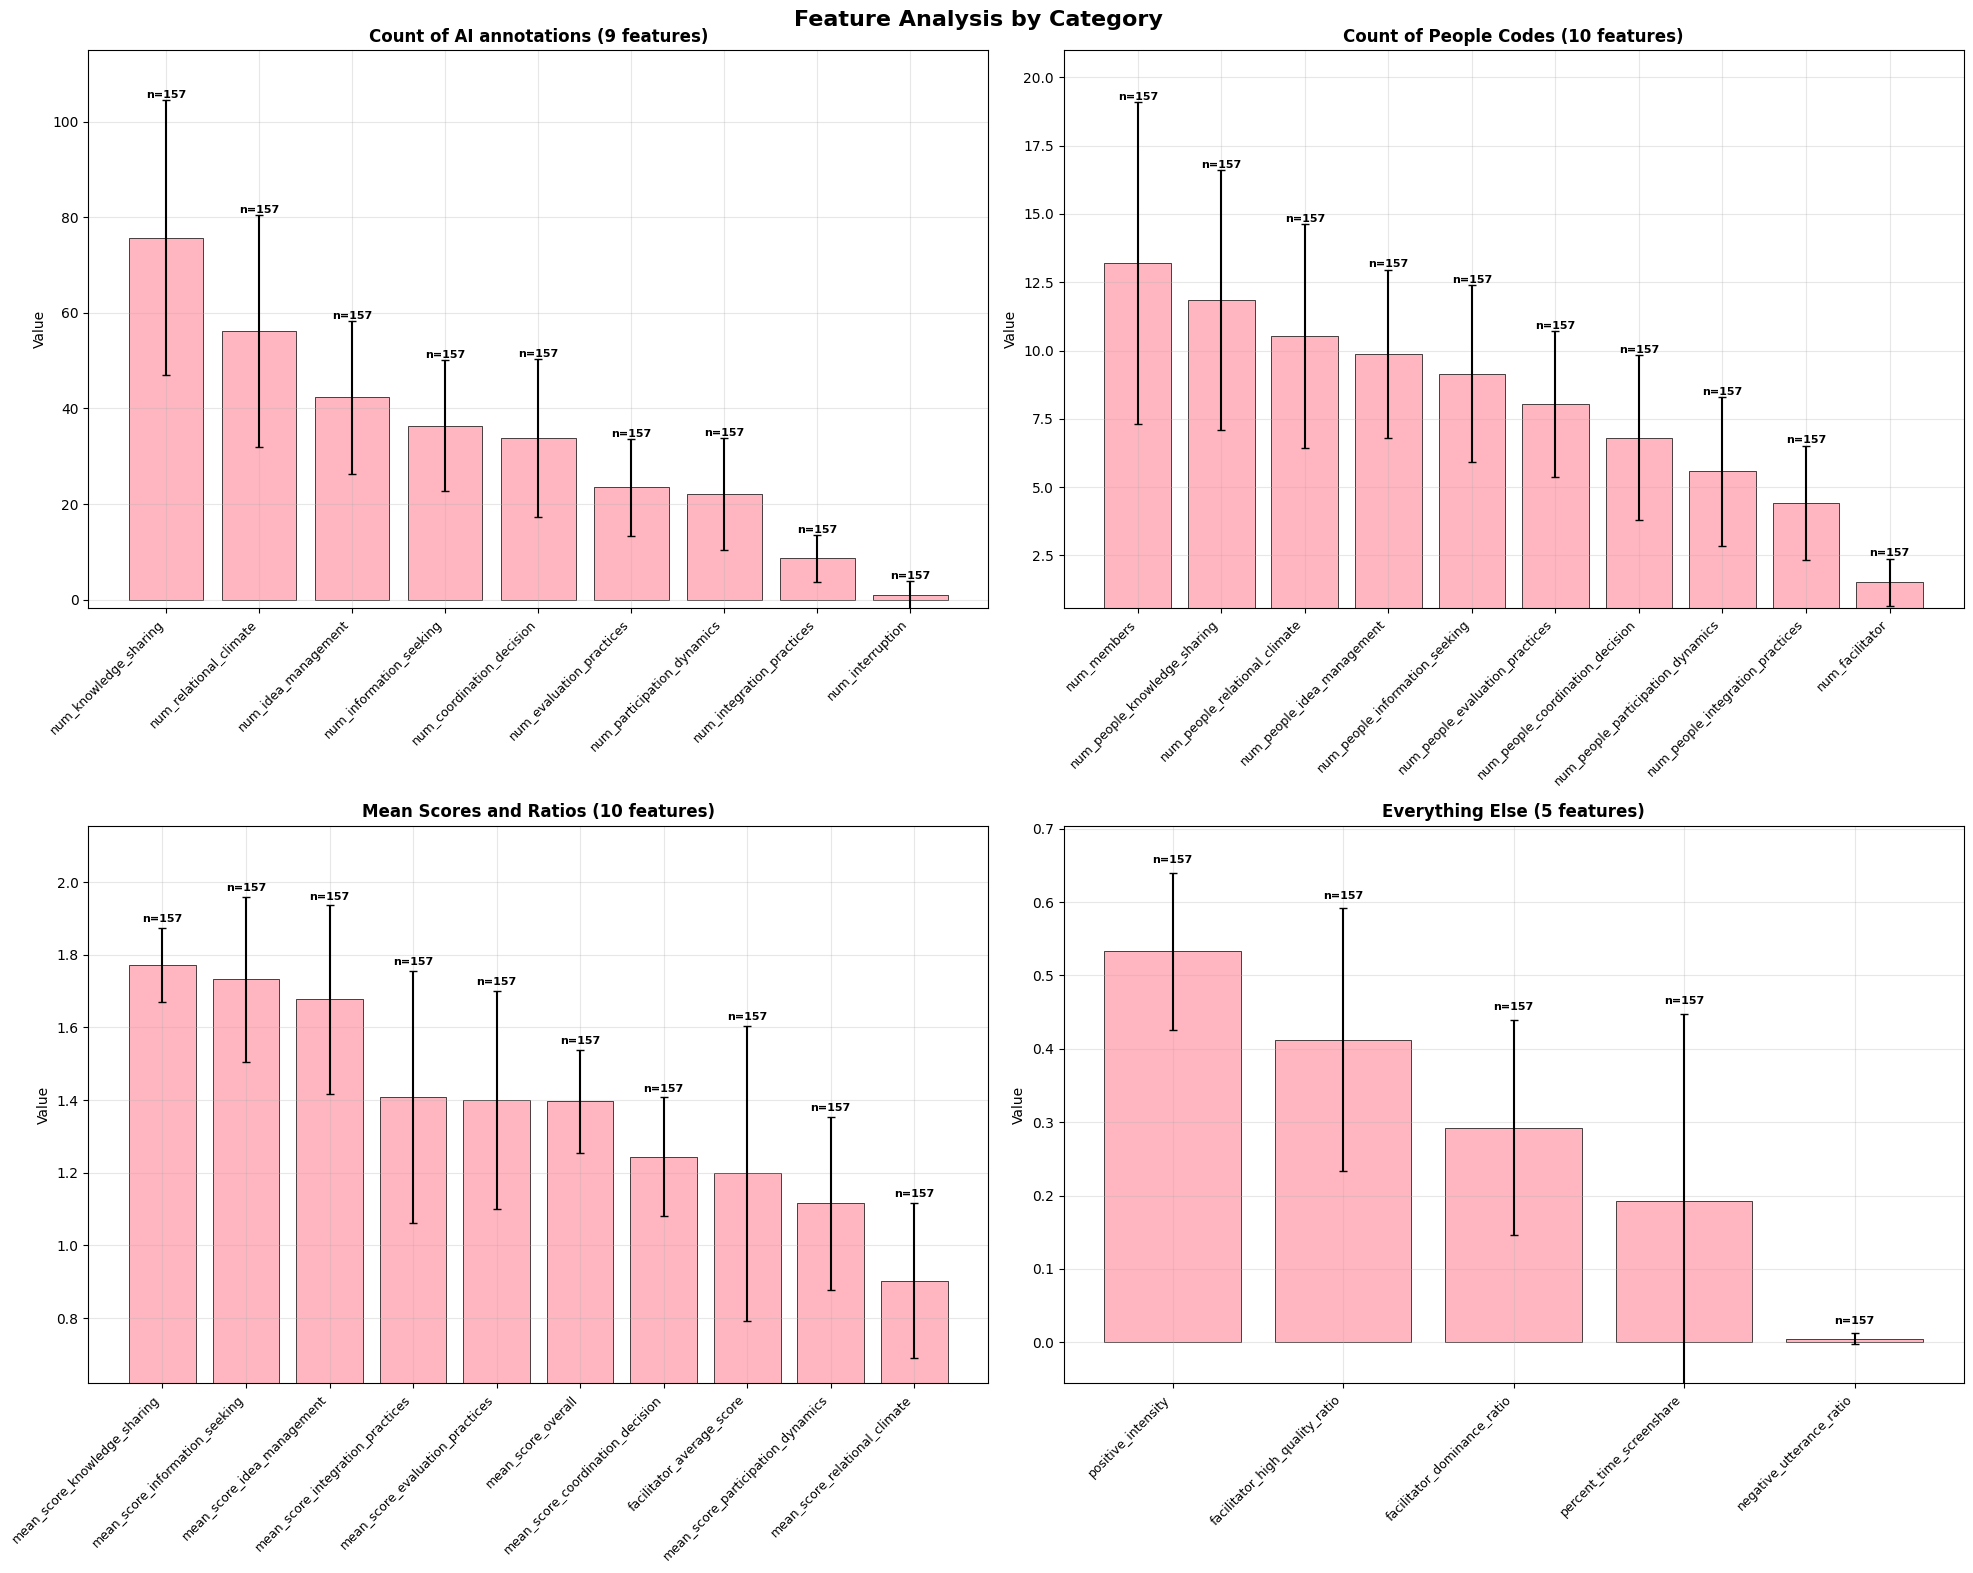


=== SUMMARY BY CATEGORY ===

📊 Count of AI annotations (9 features)
  Range: 0.955 to 75.694
  Average: 33.306
  Top 3 features: ['num_knowledge_sharing', 'num_relational_climate', 'num_idea_management']

📊 Count of People Codes (10 features)
  Range: 1.510 to 13.204
  Average: 8.098
  Top 3 features: ['num_members', 'num_people_knowledge_sharing', 'num_people_relational_climate']

📊 Mean Scores and Ratios (10 features)
  Range: 0.903 to 1.773
  Average: 1.385
  Top 3 features: ['mean_score_knowledge_sharing', 'mean_score_information_seeking', 'mean_score_idea_management']

📊 Everything Else (5 features)
  Range: 0.005 to 0.533
  Average: 0.287
  Top 3 features: ['positive_intensity', 'facilitator_high_quality_ratio', 'facilitator_dominance_ratio']


In [34]:
# Create 4 subplots in one figure
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Feature Analysis by Category', fontsize=16, fontweight='bold')

# Define the order of categories for consistent plotting
category_order = ['Count of AI annotations', 'Count of People Codes', 'Mean Scores and Ratios', 'Everything Else']

print("Starting to create plots...")
print(f"Available categories: {list(feature_categories.keys())}")

# Create a subplot for each category
for idx, category in enumerate(category_order):
    print(f"\nProcessing category {idx+1}: {category}")
    
    if category not in feature_categories or not feature_categories[category]:
        print(f"  Category '{category}' not found or empty")
        continue
        
    # Get the subplot position
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Get features for this category
    features = feature_categories[category]
    print(f"  Found {len(features)} features: {features[:3]}{'...' if len(features) > 3 else ''}")
    
    # Sort features by mean (descending)
    category_means = means[features]
    sorted_idx = category_means.sort_values(ascending=False).index
    means_sorted = category_means[sorted_idx]
    stds_sorted = stds[sorted_idx]
    counts_sorted = counts[sorted_idx]
    
    print(f"  Mean values range: {means_sorted.min():.3f} to {means_sorted.max():.3f}")
    
    x = np.arange(len(features))
    
    # Create bars with error bars
    bars = ax.bar(x, means_sorted, yerr=stds_sorted, capsize=3, 
                  color='lightpink', edgecolor='black', linewidth=0.5)
    
    # Add count labels on top of bars
    for i, (bar, count) in enumerate(zip(bars, counts_sorted)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + stds_sorted.iloc[i] + 0.01,
                f'n={int(count)}', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    ax.set_xticks(x)
    ax.set_xticklabels(sorted_idx, rotation=45, ha='right', fontsize=9)
    ax.set_ylabel('Value', fontsize=10)
    ax.set_title(f'{category} ({len(features)} features)', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Set y-axis limits to show data better
    y_min = (means_sorted - stds_sorted).min() * 0.9
    y_max = (means_sorted + stds_sorted).max() * 1.1
    ax.set_ylim(y_min, y_max)
    
    print(f"  Plot created successfully")

plt.tight_layout()
plt.show()

# Print summary for each category
print("\n=== SUMMARY BY CATEGORY ===")
for category in category_order:
    if category in feature_categories and feature_categories[category]:
        features = feature_categories[category]
        category_means = means[features]
        category_stds = stds[features]
        
        print(f"\n📊 {category} ({len(features)} features)")
        print(f"  Range: {category_means.min():.3f} to {category_means.max():.3f}")
        print(f"  Average: {category_means.mean():.3f}")
        print(f"  Top 3 features: {category_means.nlargest(3).index.tolist()}")


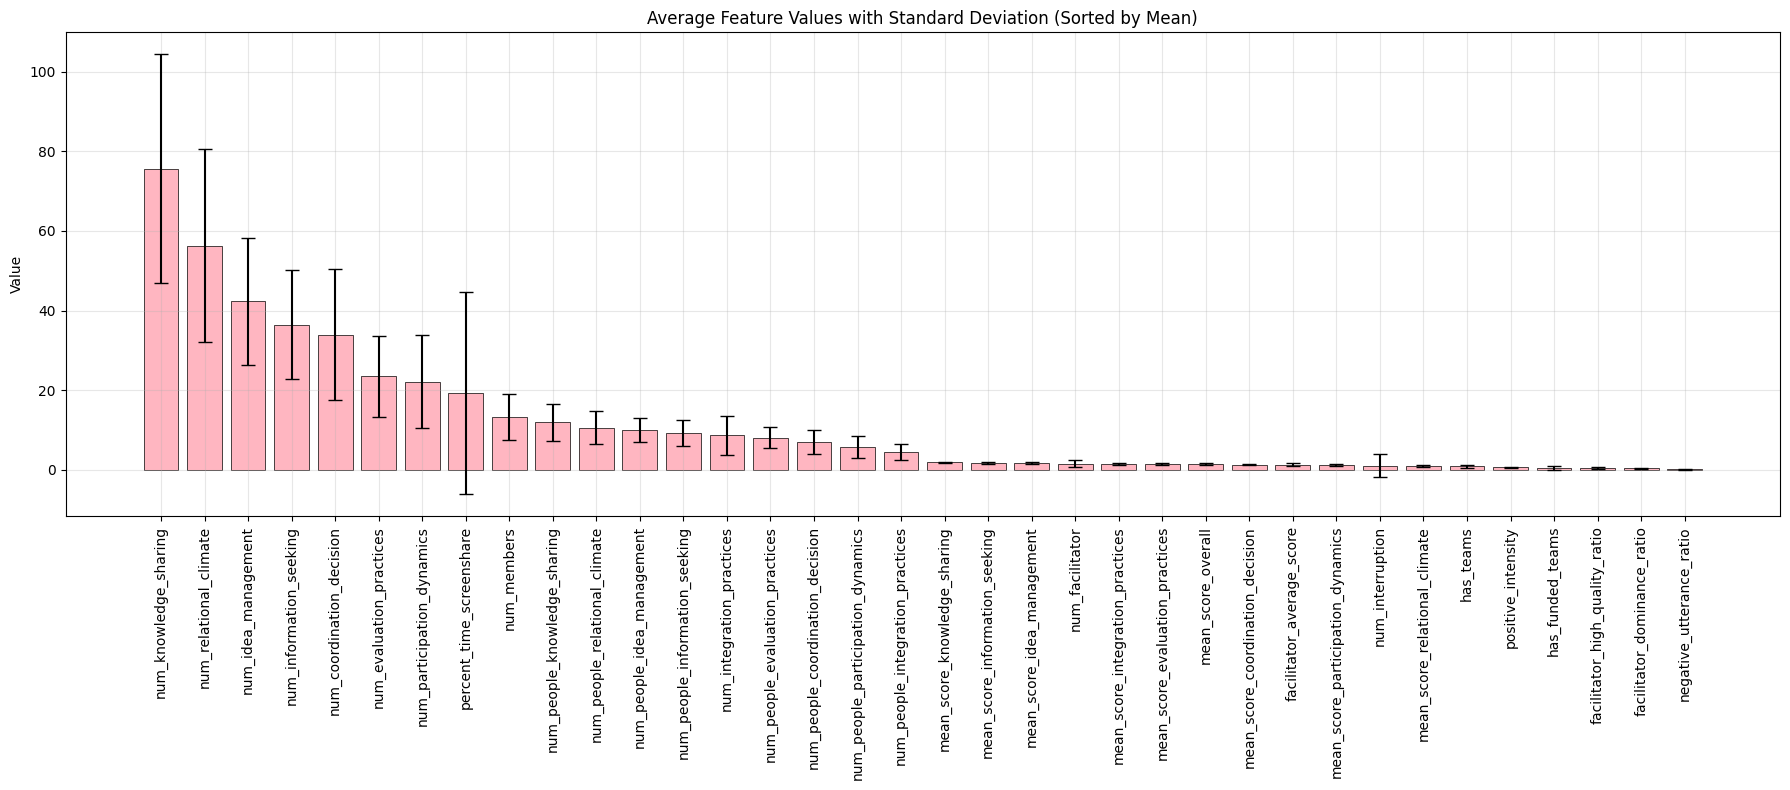

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Columns to exclude
exclude = ['conference', 'session', 'num_teams', 'num_funded_teams', 'meeting_length', 'time_screenshare']

# Select feature columns
feature_cols = [col for col in all_data_df.columns if col not in exclude and not col.endswith('_numeric')]

# Calculate statistics
means = all_data_df[feature_cols].mean()
stds = all_data_df[feature_cols].std()
counts = all_data_df[feature_cols].count()  # Get count for each feature

# Sort features by mean (descending)
sorted_idx = means.sort_values(ascending=False).index
means_sorted = means[sorted_idx]
stds_sorted = stds[sorted_idx]
counts_sorted = counts[sorted_idx]

x = np.arange(len(feature_cols))

fig, ax = plt.subplots(figsize=(18, 8))

# Create bars with error bars
bars = ax.bar(x, means_sorted, yerr=stds_sorted, capsize=5, color='lightpink', edgecolor='black', linewidth=0.5)

# Add count labels on top of bars
for i, (bar, count) in enumerate(zip(bars, counts_sorted)):
    height = bar.get_height()
    # ax.text(bar.get_x() + bar.get_width()/2., height + stds_sorted.iloc[i] + 0.05,
    #         f'n={int(count)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(x)
ax.set_xticklabels(sorted_idx, rotation=90)
ax.set_ylabel('Value')
ax.set_title('Average Feature Values with Standard Deviation (Sorted by Mean)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Scatter plots

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

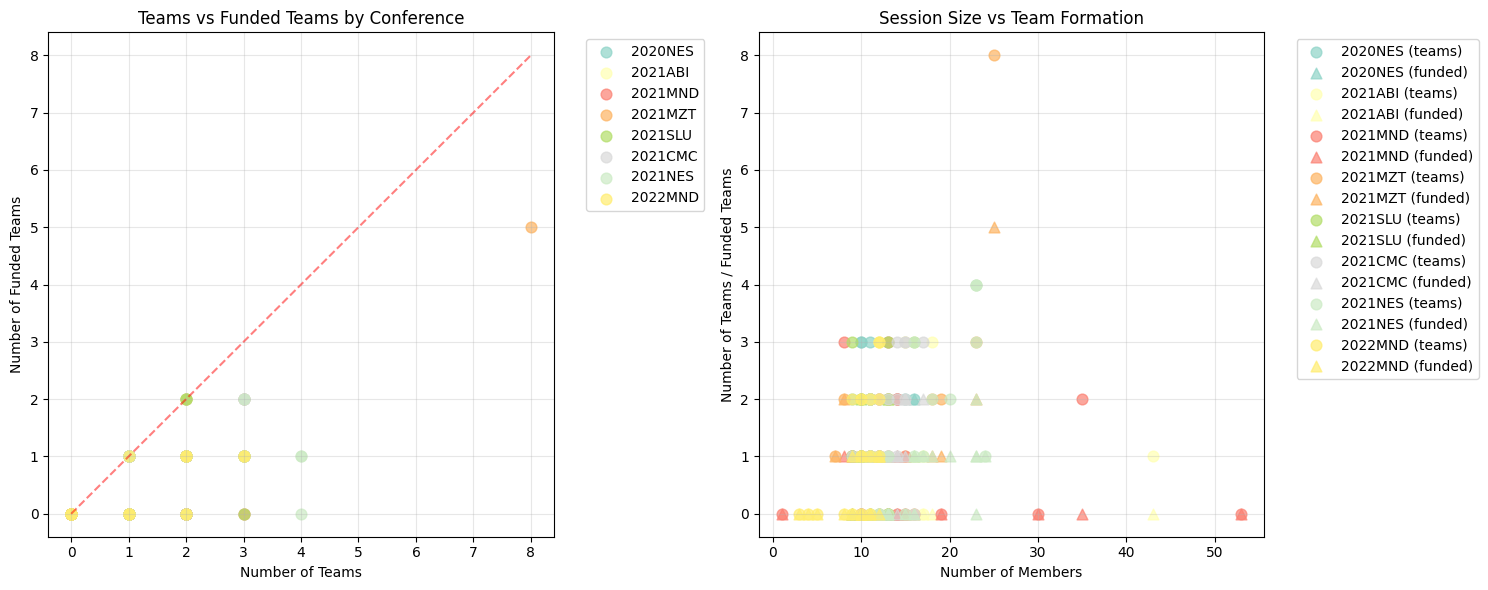

In [ ]:


# Set up plotting style
plt.style.use('default')


# 1. Conference-Level Scatter Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Teams vs Funded Teams by Conference
ax1 = axes[0]
conferences = all_data_df['conference'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(conferences)))

for i, conf in enumerate(conferences):
    conf_data = all_data_df[all_data_df['conference'] == conf]
    ax1.scatter(conf_data['num_teams'], conf_data['num_funded_teams'], 
               label=conf, alpha=0.7, s=60, color=colors[i])

ax1.set_xlabel('Number of Teams')
ax1.set_ylabel('Number of Funded Teams')
ax1.set_title('Teams vs Funded Teams by Conference')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Add diagonal line for reference (perfect correlation)
max_val = max(all_data_df['num_teams'].max(), all_data_df['num_funded_teams'].max())
ax1.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='Perfect correlation')

# Plot 2: Session Size vs Outcomes
ax2 = axes[1]
for i, conf in enumerate(conferences):
    conf_data = all_data_df[all_data_df['conference'] == conf]
    ax2.scatter(conf_data['num_members'], conf_data['num_teams'], 
               label=f'{conf} (teams)', alpha=0.7, s=60, color=colors[i], marker='o')
    ax2.scatter(conf_data['num_members'], conf_data['num_funded_teams'], 
               label=f'{conf} (funded)', alpha=0.7, s=60, color=colors[i], marker='^')

ax2.set_xlabel('Number of Members')
ax2.set_ylabel('Number of Teams / Funded Teams')
ax2.set_title('Session Size vs Team Formation')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


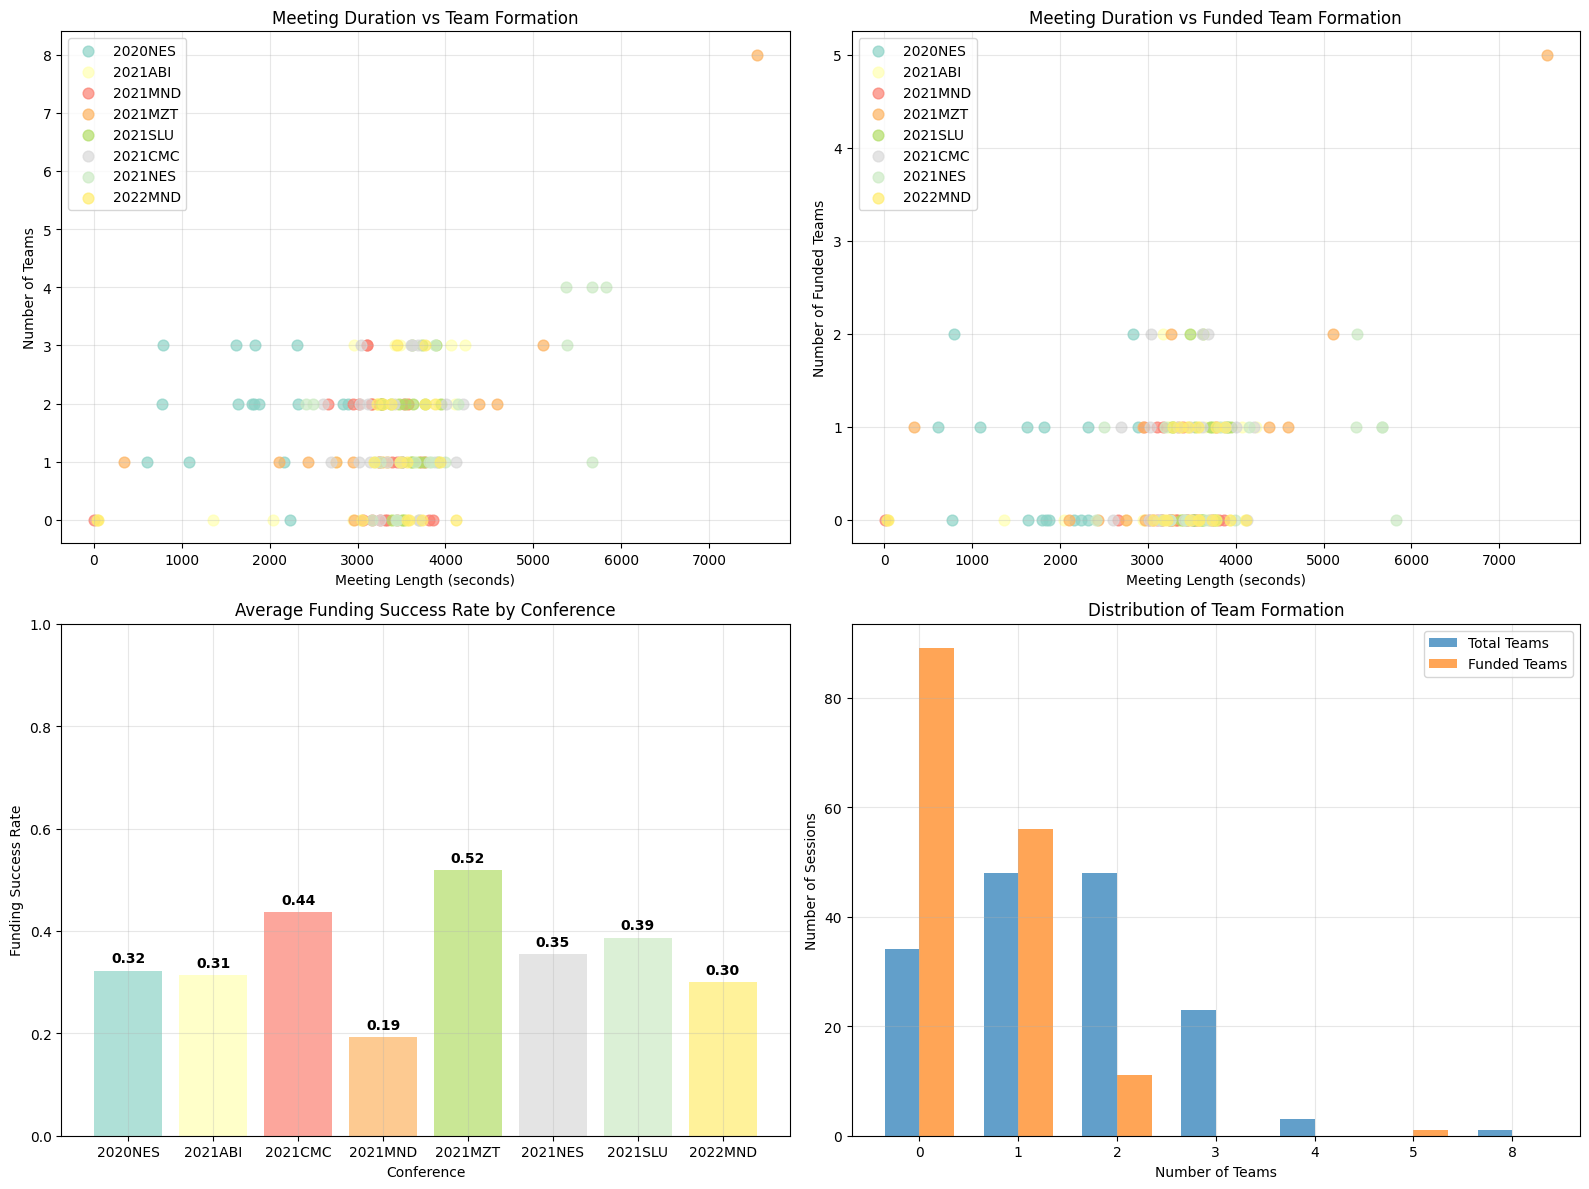

In [39]:
# Fixed version of the temporal analysis with corrected distribution plot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Meeting Length vs Teams
ax1 = axes[0, 0]
for i, conf in enumerate(conferences):
    conf_data = all_data_df[all_data_df['conference'] == conf]
    ax1.scatter(conf_data['meeting_length'], conf_data['num_teams'], 
               label=conf, alpha=0.7, s=60, color=colors[i])

ax1.set_xlabel('Meeting Length (seconds)')
ax1.set_ylabel('Number of Teams')
ax1.set_title('Meeting Duration vs Team Formation')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Meeting Length vs Funded Teams
ax2 = axes[0, 1]
for i, conf in enumerate(conferences):
    conf_data = all_data_df[all_data_df['conference'] == conf]
    ax2.scatter(conf_data['meeting_length'], conf_data['num_funded_teams'], 
               label=conf, alpha=0.7, s=60, color=colors[i])

ax2.set_xlabel('Meeting Length (seconds)')
ax2.set_ylabel('Number of Funded Teams')
ax2.set_title('Meeting Duration vs Funded Team Formation')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Funding Success Rate by Conference
ax3 = axes[1, 0]
conference_stats = all_data_df.groupby('conference').agg({
    'num_teams': 'mean',
    'num_funded_teams': 'mean'
}).reset_index()

conference_stats['funding_rate'] = conference_stats['num_funded_teams'] / conference_stats['num_teams']
conference_stats = conference_stats.fillna(0)

bars = ax3.bar(conference_stats['conference'], conference_stats['funding_rate'], 
               color=colors[:len(conference_stats)], alpha=0.7)
ax3.set_xlabel('Conference')
ax3.set_ylabel('Funding Success Rate')
ax3.set_title('Average Funding Success Rate by Conference')
ax3.set_ylim(0, 1)
ax3.grid(True, alpha=0.3)

# Add value labels on bars
for bar, rate in zip(bars, conference_stats['funding_rate']):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{rate:.2f}', ha='center', va='bottom', fontweight='bold')

# Plot 4: Team Formation Distribution (FIXED)
ax4 = axes[1, 1]
team_counts = all_data_df['num_teams'].value_counts().sort_index()
funded_counts = all_data_df['num_funded_teams'].value_counts().sort_index()

# Get all unique values from both series and create aligned counts
all_team_values = sorted(set(team_counts.index) | set(funded_counts.index))
team_aligned = [team_counts.get(val, 0) for val in all_team_values]
funded_aligned = [funded_counts.get(val, 0) for val in all_team_values]

x_pos = np.arange(len(all_team_values))
width = 0.35

bars1 = ax4.bar(x_pos - width/2, team_aligned, width, label='Total Teams', alpha=0.7)
bars2 = ax4.bar(x_pos + width/2, funded_aligned, width, label='Funded Teams', alpha=0.7)

ax4.set_xlabel('Number of Teams')
ax4.set_ylabel('Number of Sessions')
ax4.set_title('Distribution of Team Formation')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(all_team_values)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


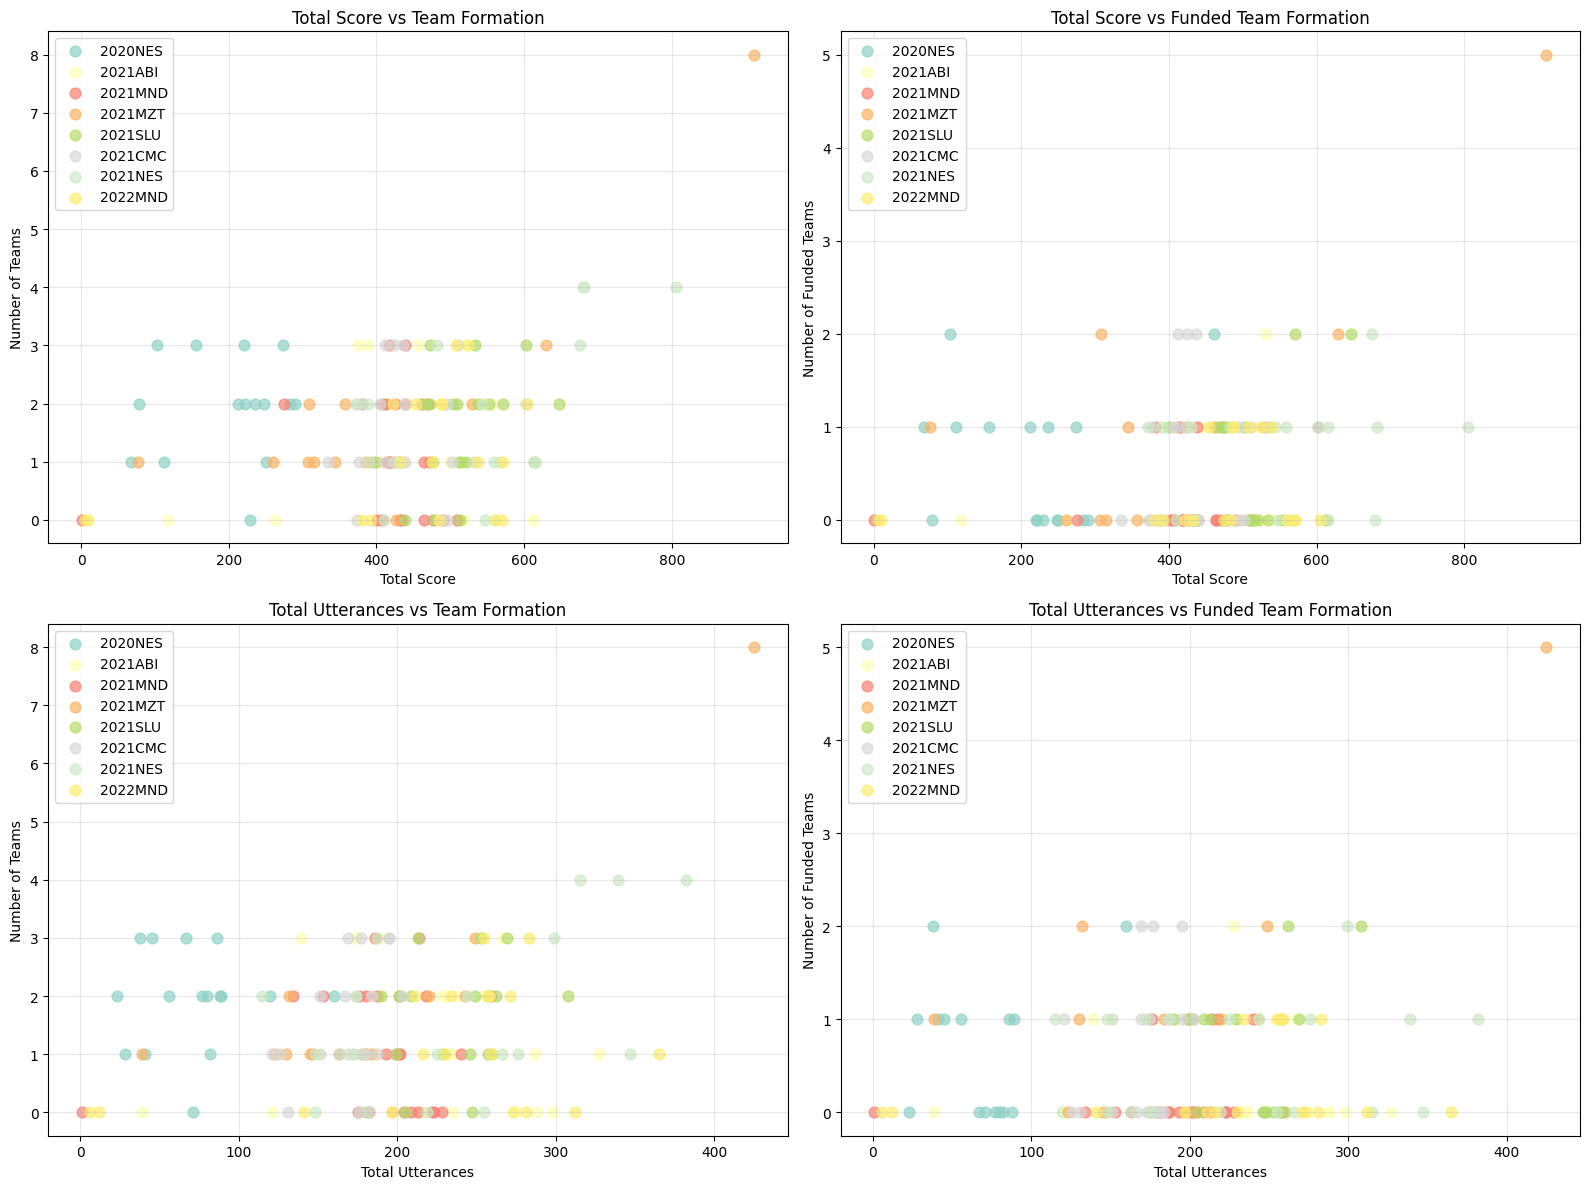

In [44]:
# Modified temporal analysis: Total Score and Total Utterances vs Team Formation
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Total Score vs Teams
ax1 = axes[0, 0]
for i, conf in enumerate(conferences):
    conf_data = all_data_df[all_data_df['conference'] == conf]
    ax1.scatter(conf_data['total_score'], conf_data['num_teams'], 
               label=conf, alpha=0.7, s=60, color=colors[i])

ax1.set_xlabel('Total Score')
ax1.set_ylabel('Number of Teams')
ax1.set_title('Total Score vs Team Formation')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Total Score vs Funded Teams
ax2 = axes[0, 1]
for i, conf in enumerate(conferences):
    conf_data = all_data_df[all_data_df['conference'] == conf]
    ax2.scatter(conf_data['total_score'], conf_data['num_funded_teams'], 
               label=conf, alpha=0.7, s=60, color=colors[i])

ax2.set_xlabel('Total Score')
ax2.set_ylabel('Number of Funded Teams')
ax2.set_title('Total Score vs Funded Team Formation')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Total Utterances vs Teams
ax3 = axes[1, 0]
for i, conf in enumerate(conferences):
    conf_data = all_data_df[all_data_df['conference'] == conf]
    ax3.scatter(conf_data['total_utterances'], conf_data['num_teams'], 
               label=conf, alpha=0.7, s=60, color=colors[i])

ax3.set_xlabel('Total Utterances')
ax3.set_ylabel('Number of Teams')
ax3.set_title('Total Utterances vs Team Formation')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Total Utterances vs Funded Teams
ax4 = axes[1, 1]
for i, conf in enumerate(conferences):
    conf_data = all_data_df[all_data_df['conference'] == conf]
    ax4.scatter(conf_data['total_utterances'], conf_data['num_funded_teams'], 
               label=conf, alpha=0.7, s=60, color=colors[i])

ax4.set_xlabel('Total Utterances')
ax4.set_ylabel('Number of Funded Teams')
ax4.set_title('Total Utterances vs Funded Team Formation')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Number of numeric variables: 29


NameError: name 'conferences' is not defined

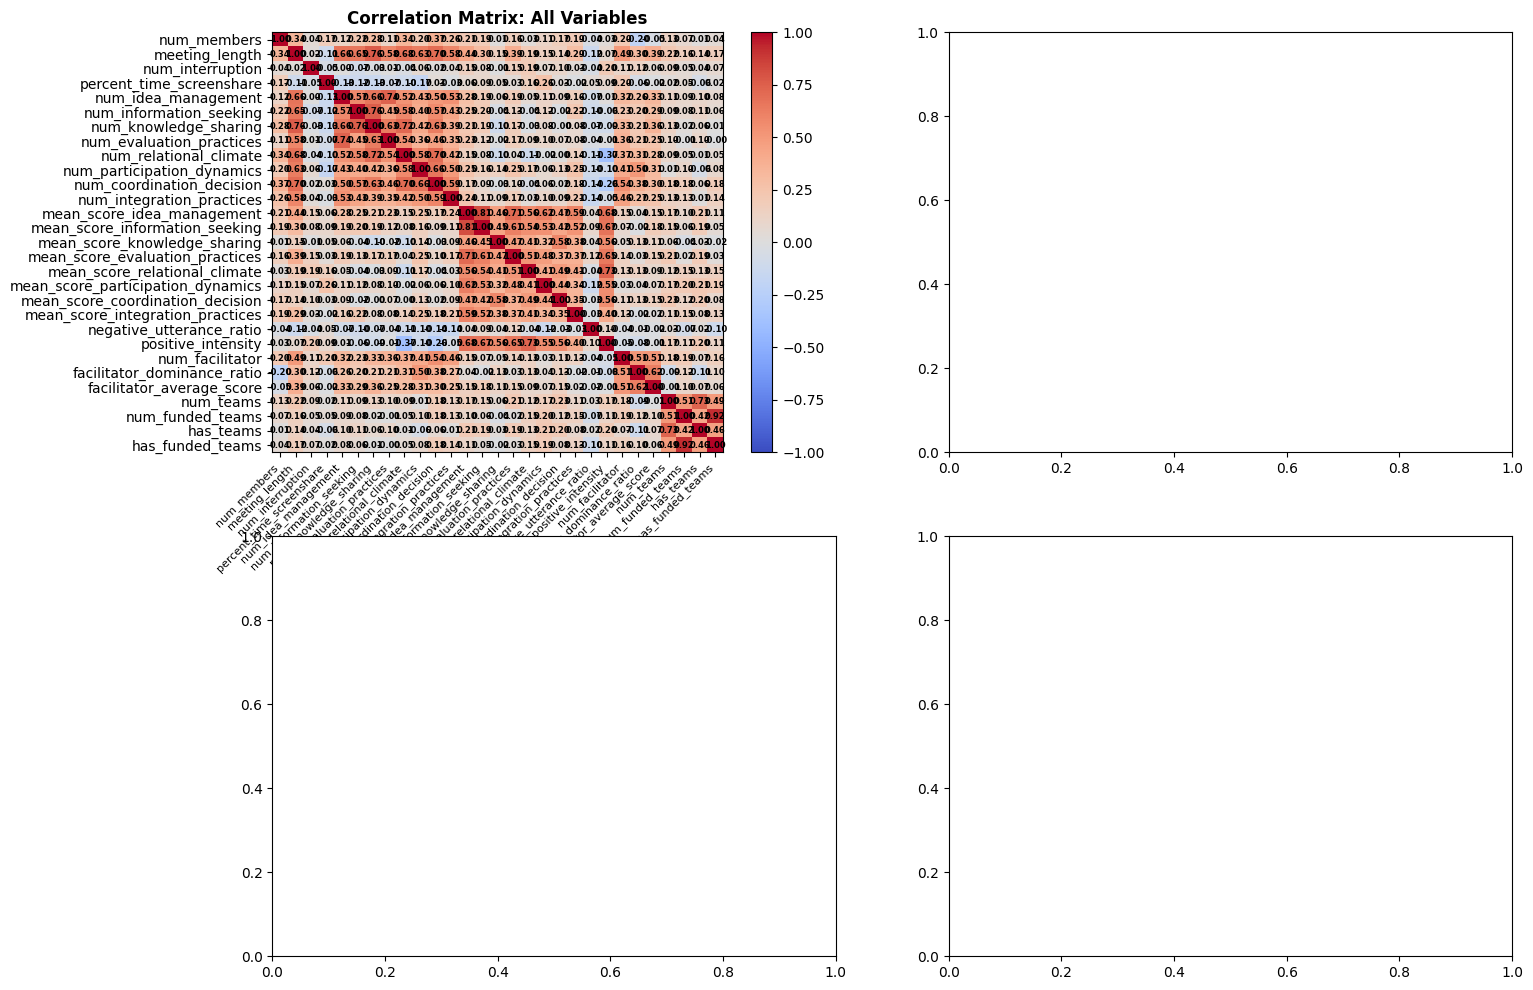

In [9]:
# 3. Advanced Correlation and Feature Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Correlation Heatmap for Key Variables
ax1 = axes[0, 0]
numeric_cols = all_data_df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Number of numeric variables: {len(numeric_cols)}")

key_vars = numeric_cols

corr_data = all_data_df[key_vars].corr()

im = ax1.imshow(corr_data, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
ax1.set_xticks(range(len(key_vars)))
ax1.set_yticks(range(len(key_vars)))
ax1.set_xticklabels(key_vars, rotation=45, ha='right', fontsize=8)
ax1.set_yticklabels(key_vars)

# Add correlation values to heatmap
for i in range(len(key_vars)):
    for j in range(len(key_vars)):
        text = ax1.text(j, i, f'{corr_data.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontweight='bold', fontsize=6)

ax1.set_title('Correlation Matrix: All Variables', fontsize=12, fontweight='bold')
plt.colorbar(im, ax=ax1)

# Plot 2: Bubble Chart - Size vs Teams vs Funded Teams
ax2 = axes[0, 1]
for i, conf in enumerate(conferences):
    conf_data = all_data_df[all_data_df['conference'] == conf]
    # Bubble size based on meeting length
    bubble_sizes = conf_data['meeting_length'] / 100  # Scale for visibility
    
    scatter = ax2.scatter(conf_data['num_teams'], conf_data['num_funded_teams'], 
                         s=bubble_sizes, label=conf, alpha=0.6, color=colors[i])

ax2.set_xlabel('Number of Teams')
ax2.set_ylabel('Number of Funded Teams')
ax2.set_title('Team Formation (Bubble size = Meeting Length)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Success Rate vs Session Characteristics
ax3 = axes[1, 0]
all_data_df['success_rate'] = all_data_df['num_funded_teams'] / all_data_df['num_teams'].replace(0, np.nan)

for i, conf in enumerate(conferences):
    conf_data = all_data_df[all_data_df['conference'] == conf]
    ax3.scatter(conf_data['num_members'], conf_data['success_rate'], 
               label=conf, alpha=0.7, s=60, color=colors[i])

ax3.set_xlabel('Number of Members')
ax3.set_ylabel('Funding Success Rate')
ax3.set_title('Session Size vs Funding Success Rate')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 1)

# Plot 4: Box Plot - Team Formation by Conference
ax4 = axes[1, 1]
conference_teams = [all_data_df[all_data_df['conference'] == conf]['num_teams'].values 
                   for conf in conferences]
conference_funded = [all_data_df[all_data_df['conference'] == conf]['num_funded_teams'].values 
                     for conf in conferences]

# Create box plots
bp1 = ax4.boxplot(conference_teams, positions=range(1, len(conferences)*2, 2), 
                  widths=0.6, patch_artist=True, labels=conferences)
bp2 = ax4.boxplot(conference_funded, positions=range(2, len(conferences)*2+1, 2), 
                  widths=0.6, patch_artist=True, labels=['']*len(conferences))

# Color the boxes
for patch in bp1['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)
for patch in bp2['boxes']:
    patch.set_facecolor('lightcoral')
    patch.set_alpha(0.7)

ax4.set_xlabel('Conference')
ax4.set_ylabel('Number of Teams')
ax4.set_title('Team Formation Distribution by Conference')
ax4.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Total Teams', 'Funded Teams'])
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [45]:
#print rows in all_data_df where conference is '2021MND' and num_funded_teams is bigger than 0
all_data_df[(all_data_df['conference'] == '2021MND') & (all_data_df['num_funded_teams'] > 0)]


,conference,session,num_members,meeting_length,num_interruption,percent_time_screenshare,num_idea_management,num_information_seeking,num_knowledge_sharing,num_evaluation_practices,...,positive_intensity,num_facilitator,facilitator_dominance_ratio,facilitator_high_quality_ratio,facilitator_average_score,num_teams,num_funded_teams,has_teams,has_funded_teams,success_rate
46,2021MND,2021_04_22_MND_S4,15,3396,0,0.235571,44,38,84,24,...,0.400000,1,0.166667,0.475000,1.294118,1,1,1,1,1.000000
48,2021MND,2021_04_23_MND_S11,8,3107,0,0.070808,52,57,88,9,...,0.574766,1,0.406542,0.678161,1.580153,3,1,1,1,0.333333
55,2021MND,2021_04_23_MND_S2,14,2953,0,0.146969,45,26,58,18,...,0.362385,1,0.197248,0.302326,1.141026,2,1,1,1,0.500000
59,2021MND,2021_04_23_MND_S5,14,3168,0,0.082702,48,34,65,15,...,0.539773,1,0.170455,0.466667,1.274194,2,1,1,1,0.500000
62,2021MND,2021_04_22_MND_S1,12,3770,0,0.197613,51,40,66,26,...,0.522613,1,0.281407,0.375000,1.285714,1,1,1,1,1.000000


### Visualize a individual session

In [54]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import numpy as np
import os
import re
import urllib.parse

def safe_file_path(path):
    # Split the path into directory and filename
    directory = os.path.dirname(path)
    filename = os.path.basename(path)
    # URL encode the filename to handle special characters
    safe_filename = urllib.parse.quote(filename, safe='')
    # Rejoin the path
    return os.path.join(directory, safe_filename)

def analyze_meeting(file_path):
    # Safely handle the file path
    conf_name = file_path.split('/')[-1].split('.')[0]
    print(conf_name)
    # Use the safe file path
    safe_path = safe_file_path(file_path)
    feature_path = safe_file_path(file_path.replace('session_data/', 'featurized data/features_'))

    with open(safe_path, 'r') as f:
        data = json.load(f)
    
    with open(feature_path, 'r') as f:
        feature_data = json.load(f)

    # Extract just the base filename without path and extension
    file_name = os.path.basename(file_path)
    file_name = os.path.splitext(file_name)[0]  # Remove extension

    # Extract annotations
    all_annotations = []
    data = data['all_data']
    for entry in data:
        if 'annotations' in entry:
            if isinstance(entry['annotations'], dict):
                all_annotations.extend(entry['annotations'].keys())
            elif isinstance(entry['annotations'], list):
                all_annotations.extend(entry['annotations'])

    # remove 'None' from all_annotations
    all_annotations = [annotation for annotation in all_annotations if annotation != 'None']

    def normalize_annotation(annotation):
        # Replace underscores with spaces and convert to lowercase
        normalized = re.sub(r'_', ' ', annotation.lower()).strip()
        return normalized

    # Create a mapping of normalized forms to all their original forms
    normalized_to_originals = defaultdict(list)
    for annotation in all_annotations:
        normalized = normalize_annotation(annotation)
        normalized_to_originals[normalized].append(annotation)

    # Choose the most common original form for each normalized form
    normalized_to_preferred = {}
    for normalized, originals in normalized_to_originals.items():
        # Count occurrences of each original form
        original_counts = Counter(originals)
        # Choose the most common one (or the first if tied)
        preferred = max(original_counts.items(), key=lambda x: (x[1], len(x[0])))[0]
        normalized_to_preferred[normalized] = preferred

    # Count normalized annotations
    normalized_counts = Counter(normalize_annotation(a) for a in all_annotations)

    # Create a DataFrame with normalized counts and preferred original names
    annotation_df = pd.DataFrame({
        'normalized_name': list(normalized_counts.keys()),
        'count': list(normalized_counts.values()),
        'original_name': [normalized_to_preferred[n] for n in normalized_counts.keys()]
    })

    # Sort by count
    annotation_df = annotation_df.sort_values('count', ascending=True)

    # Calculate speaking time per speaker
    speaker_times = defaultdict(int)
    for entry in data:
        speaker_times[entry['speaker']] += int(entry['speaking_duration'])

    # Create turn taking sequence
    turn_sequence = [entry['speaker'] for entry in data]

    # Set the style
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")

    # Create one figure with 4 subplots
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle(f'Meeting Analysis for {conf_name}', fontsize=16, fontweight='bold', y=0.98)

    # 1. Annotation counts (top-left)
    ax1 = axes[0, 0]
    sns.barplot(data=annotation_df, x='count', y='original_name', ax=ax1)
    ax1.set_title('Annotation Types and Their Frequencies', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Count', fontsize=10)
    ax1.set_ylabel('Annotation Type', fontsize=10)

    # 2. Speaking time per speaker (top-right)
    ax2 = axes[0, 1]
    speaker_df = pd.DataFrame.from_dict(speaker_times, orient='index', columns=['duration'])
    speaker_df = speaker_df.sort_values('duration', ascending=True)
    sns.barplot(data=speaker_df.reset_index(), x='duration', y='index', ax=ax2)
    ax2.set_title('Total Speaking Duration by Speaker', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Duration (seconds)', fontsize=10)
    ax2.set_ylabel('Speaker', fontsize=10)

    # 3. Turn taking pattern (bottom-left)
    ax3 = axes[1, 0]
    unique_speakers = list(set(turn_sequence))
    y_positions = range(len(unique_speakers))
    speaker_to_y = dict(zip(unique_speakers, y_positions))
    x_positions = range(len(turn_sequence))
    y_values = [speaker_to_y[speaker] for speaker in turn_sequence]

    ax3.plot(x_positions, y_values, 'o-', linewidth=1.5, markersize=4)
    ax3.set_yticks(y_positions)
    ax3.set_yticklabels(unique_speakers)
    ax3.set_title('Turn Taking Pattern Over Time', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Turn Sequence', fontsize=10)
    ax3.set_ylabel('Speaker', fontsize=10)
    ax3.grid(True, alpha=0.3)

    # 4. Timeline visualization of annotations (bottom-right)
    ax4 = axes[1, 1]
    
    # Prepare data for timeline visualization
    timeline_data = []
    colors = plt.cm.Set3(np.linspace(0, 1, len(normalized_counts)))

    # Convert time strings to seconds for x-axis
    def time_to_seconds(time_str):
        """Convert time string like '00:01' to seconds"""
        minutes, seconds = map(int, time_str.split(':'))
        return minutes * 60 + seconds

    # Collect all annotation occurrences with their timing
    for entry in data:
        if 'annotations' in entry and entry['annotations']:
            start_time = time_to_seconds(entry['start_time'])
            end_time = time_to_seconds(entry['end_time'])
            duration = end_time - start_time
            
            for annotation in entry['annotations'].keys():
                if annotation != 'None':
                    normalized_annotation = normalize_annotation(annotation)
                    timeline_data.append({
                        'annotation': normalized_annotation,
                        'start_time': start_time,
                        'end_time': end_time,
                        'duration': duration
                    })

    # Create DataFrame for timeline
    timeline_df = pd.DataFrame(timeline_data)

    if not timeline_df.empty:
        # Count frequency of each annotation type
        annotation_counts = timeline_df['annotation'].value_counts()
        
        # Sort annotations by frequency (most frequent first, which will be at bottom)
        unique_annotations = annotation_counts.index.tolist()
        annotation_to_color = dict(zip(unique_annotations, colors[:len(unique_annotations)]))
        
        # Create the timeline plot with frequency-sorted y-positions
        y_positions = range(len(unique_annotations))
        annotation_to_y = dict(zip(unique_annotations, y_positions))
        
        # Plot horizontal bars for each annotation occurrence
        for _, row in timeline_df.iterrows():
            annotation = row['annotation']
            start_time = row['start_time']
            duration = row['duration']
            y_pos = annotation_to_y[annotation]
            color = annotation_to_color[annotation]
            
            ax4.barh(y_pos, duration, left=start_time, height=0.6, 
                    color=color, alpha=0.8, edgecolor='black', linewidth=0.5)
        
        # Customize the plot
        ax4.set_yticks(y_positions)
        ax4.set_yticklabels(unique_annotations)
        ax4.set_xlabel('Time (seconds)', fontsize=10)
        ax4.set_ylabel('Annotation Types', fontsize=10)
        ax4.set_title('Timeline of Annotation Occurrences', fontsize=12, fontweight='bold')
        ax4.grid(True, alpha=0.3, axis='x')
        
        # Add legend
        legend_elements = [plt.Rectangle((0,0),1,1, facecolor=annotation_to_color[ann], 
                                    edgecolor='black', linewidth=0.5, label=ann) 
                        for ann in unique_annotations]
        ax4.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    else:
        ax4.text(0.5, 0.5, 'No annotation data found for timeline visualization', 
                ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('Timeline of Annotation Occurrences', fontsize=12, fontweight='bold')

    # Adjust layout and save
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Make room for the main title
    plt.savefig(f'meeting_analysis_{file_name}.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

2021_09_30_MZT_S5


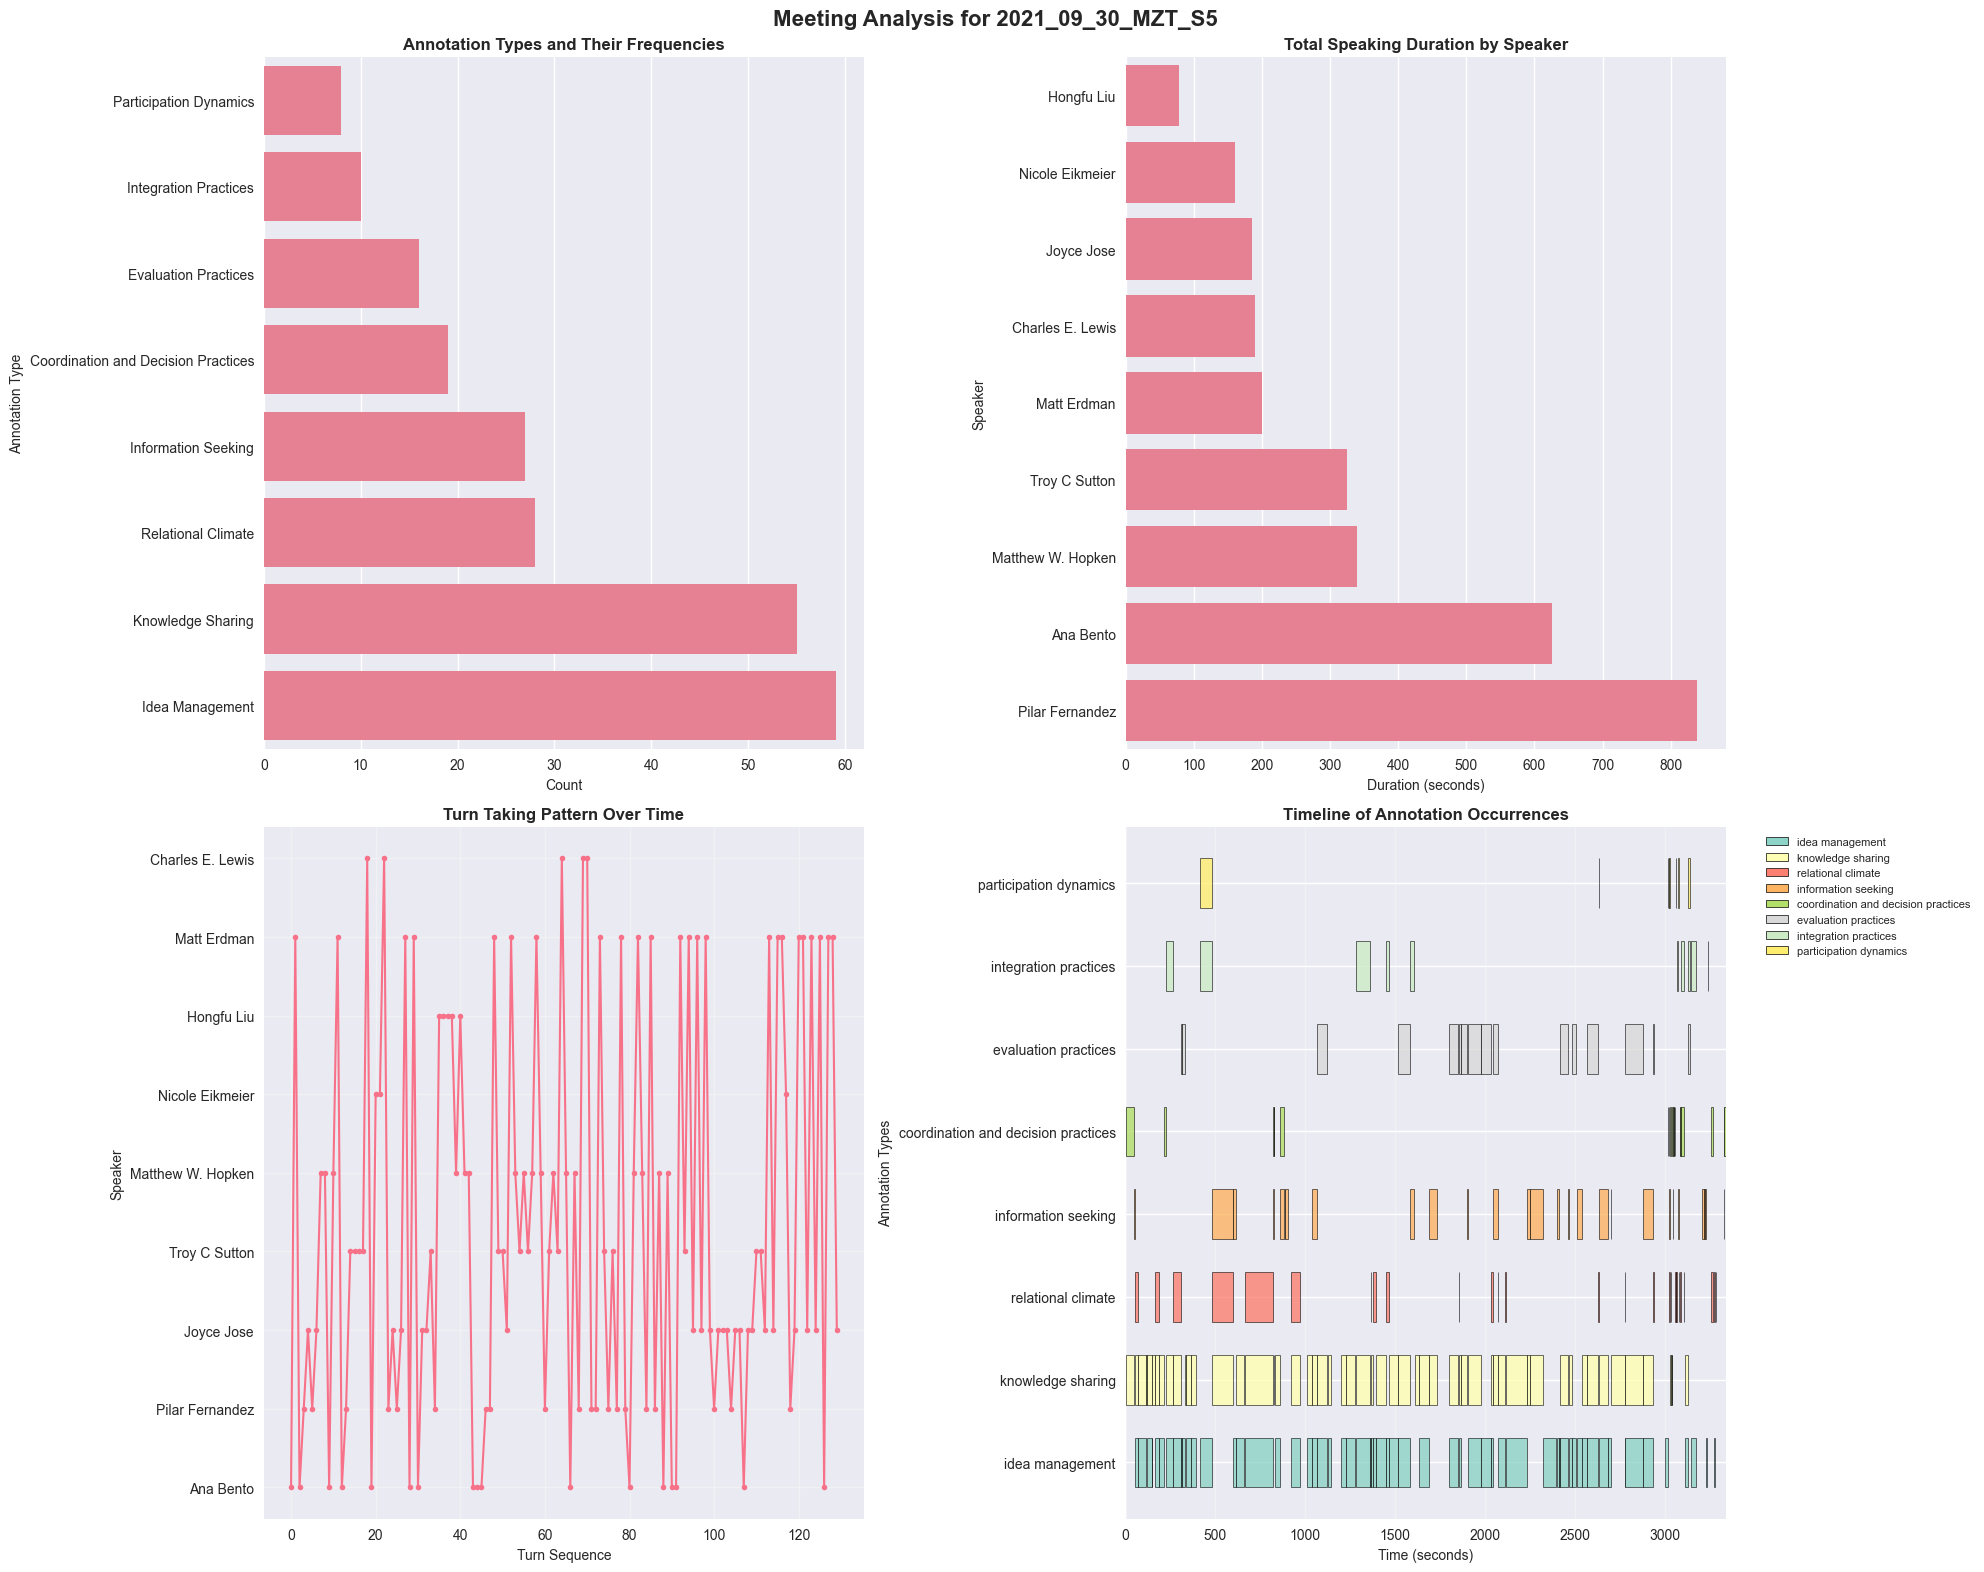

In [55]:
session_name = '2021_09_30_MZT_S5'
conf_name = '2021MZT'
session_data_path = f"data/{conf_name}/session_data/{session_name}.json"
feature_data_path = f"data/{conf_name}/featurized data/features_{session_name}.json"
    # Read the JSON data
analyze_meeting(session_data_path)

2022_04_07_MND_S6


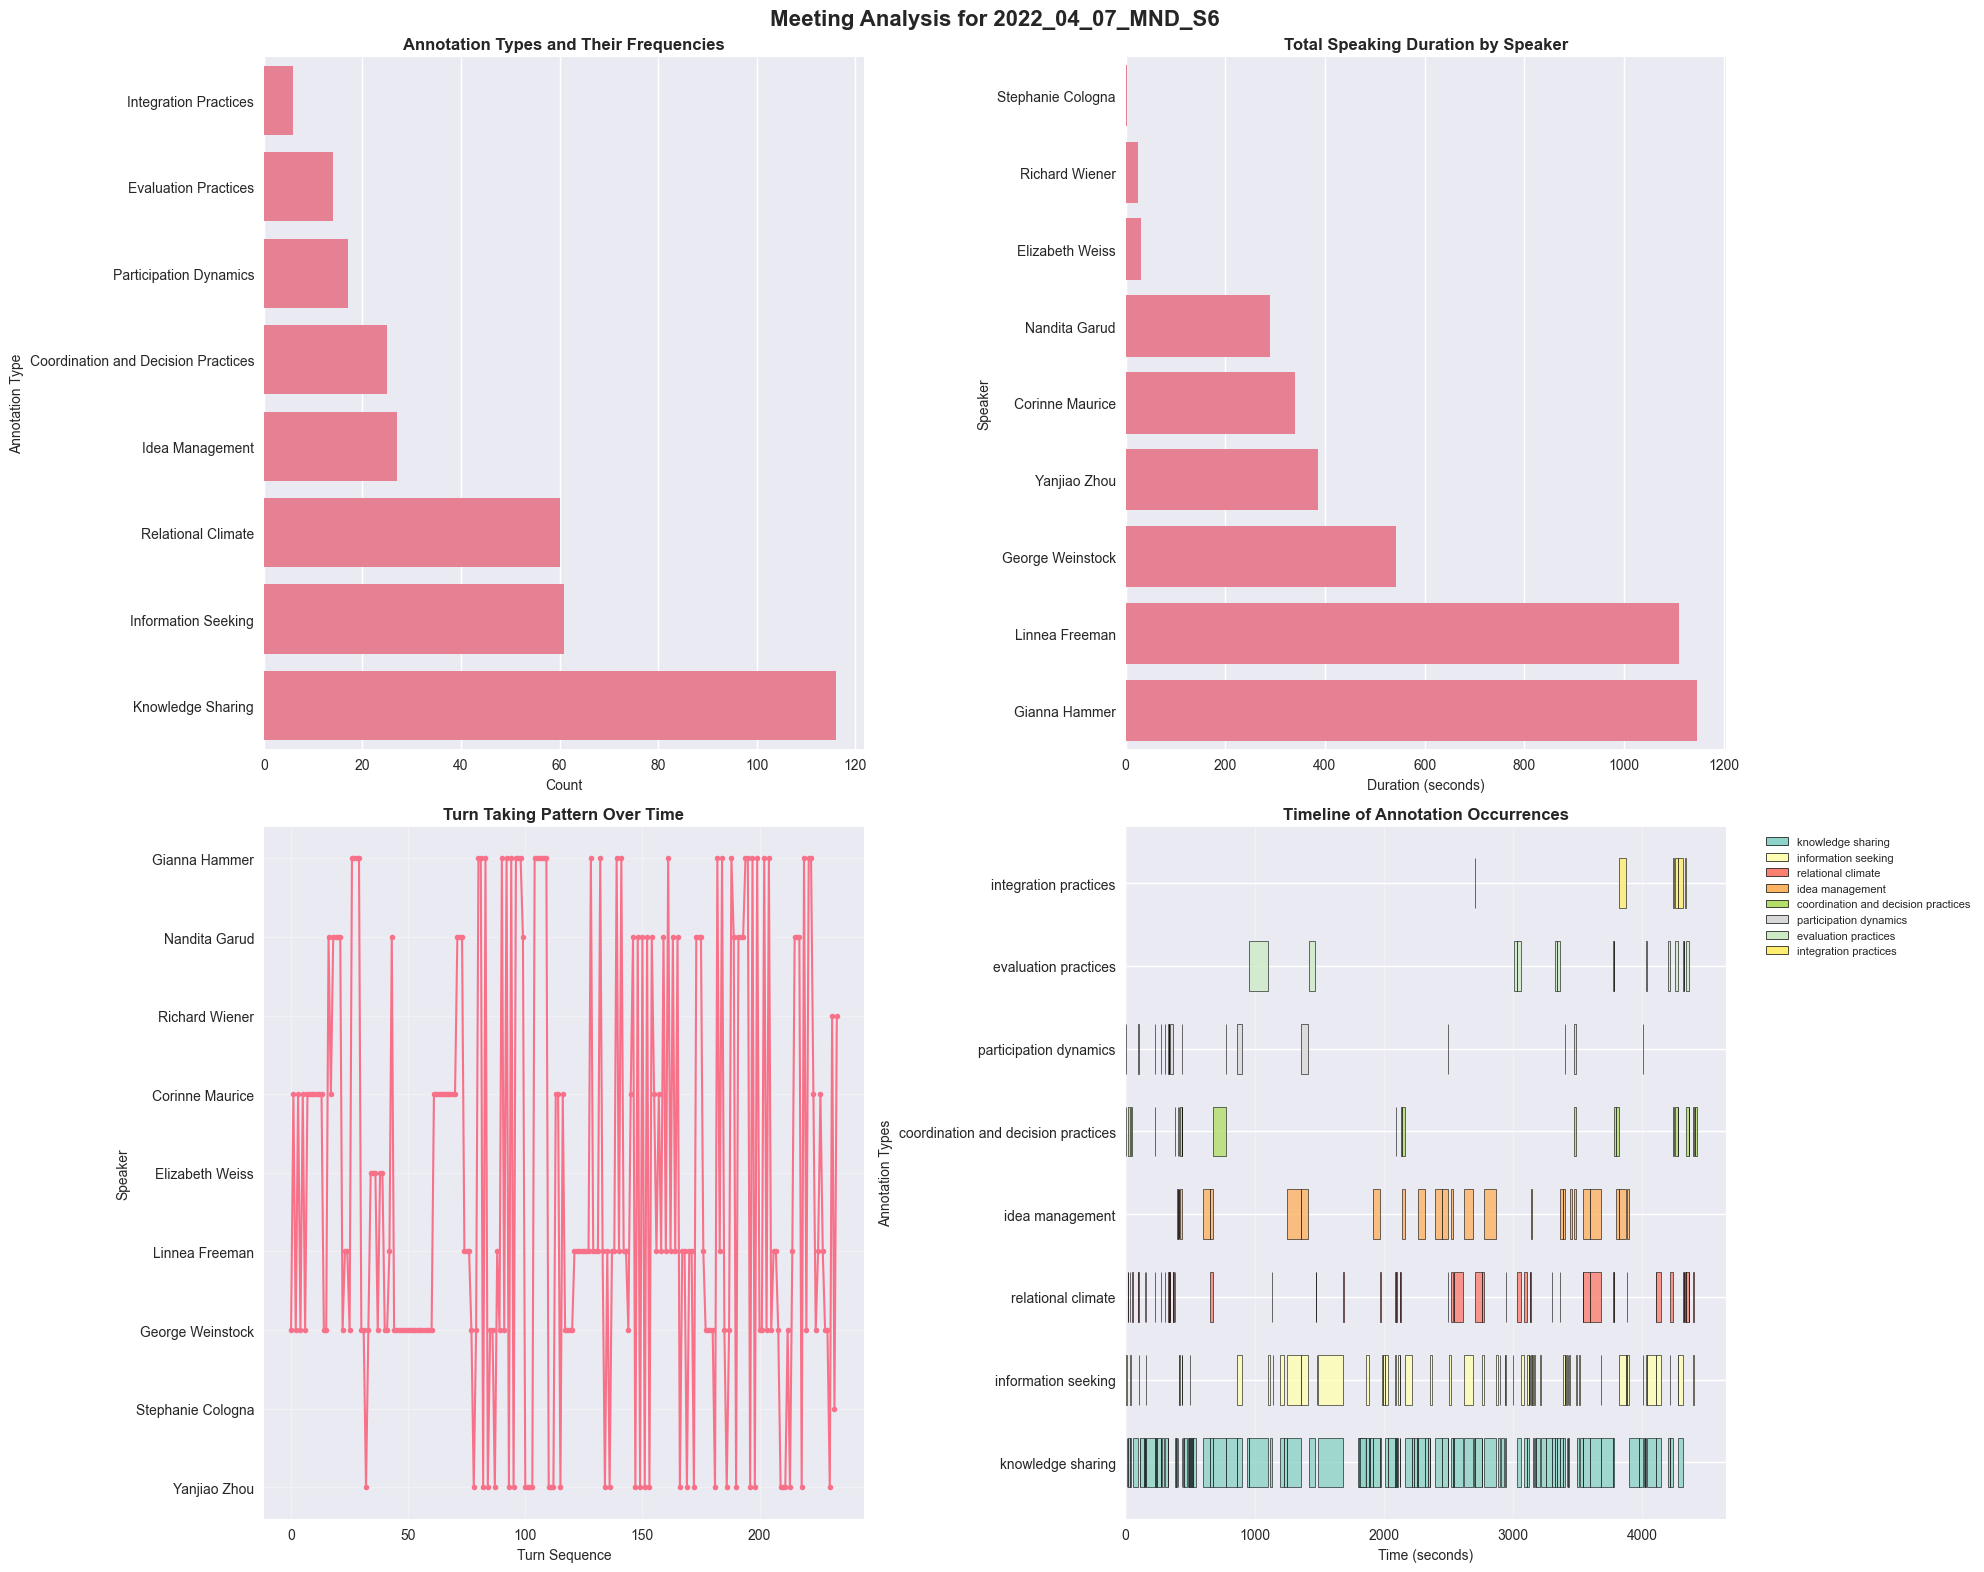

In [56]:
session_name = '2022_04_07_MND_S6'
conf_name = '2022MND'
session_data_path = f"data/{conf_name}/session_data/{session_name}.json"
feature_data_path = f"data/{conf_name}/featurized data/features_{session_name}.json"
    # Read the JSON data
analyze_meeting(session_data_path)

### Compare two sessions side by side

In [ ]:
## create visusalization with side by side comparison
def normalize_annotation(annotation):
    """Normalize annotation names for consistency"""
    # Add your normalization logic here if needed
    return annotation.lower().replace(' ', '_')

def time_to_seconds(time_str):
    """Convert time string like '00:01' to seconds"""
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

def create_timeline_visualization(data, conf_name, file_name, all_annotation_types=None, ax=None, show_y_labels=True):
    """
    Create timeline visualization for a single session
    all_annotation_types: list of all possible annotation types for consistent ordering
    ax: matplotlib axis to plot on (if None, creates new figure)
    show_y_labels: whether to show y-axis labels (set to False for side-by-side comparison)
    """
    if ax is None:
        plt.figure(figsize=(16, 10))
        ax = plt.gca()
    
    # Prepare data for timeline visualization
    timeline_data = []
    colors = plt.cm.Set3(np.linspace(0, 1, 20))  # Use more colors for consistency

    # Collect all annotation occurrences with their timing
    for entry in data:
        if 'annotations' in entry and entry['annotations']:
            start_time = time_to_seconds(entry['start_time'])
            end_time = time_to_seconds(entry['end_time'])
            duration = end_time - start_time
            
            for annotation in entry['annotations'].keys():
                if annotation != 'None':
                    normalized_annotation = normalize_annotation(annotation)
                    timeline_data.append({
                        'annotation': normalized_annotation,
                        'start_time': start_time,
                        'end_time': end_time,
                        'duration': duration
                    })

    # Create DataFrame for timeline
    timeline_df = pd.DataFrame(timeline_data)

    if not timeline_df.empty:
        # Get unique annotations for this session
        session_annotations = timeline_df['annotation'].unique()
        
        # If all_annotation_types is provided, use it for consistent ordering
        if all_annotation_types is not None:
            # Filter to only include annotations that exist in this session
            available_annotations = [ann for ann in all_annotation_types if ann in session_annotations]
            unique_annotations = available_annotations
        else:
            unique_annotations = sorted(session_annotations)
        
        # Assign colors and positions
        annotation_to_color = dict(zip(unique_annotations, colors[:len(unique_annotations)]))
        y_positions = range(len(unique_annotations))
        annotation_to_y = dict(zip(unique_annotations, y_positions))
        
        # Plot horizontal bars for each annotation occurrence
        for _, row in timeline_df.iterrows():
            annotation = row['annotation']
            if annotation in annotation_to_y:  # Only plot if annotation is in our ordered list
                start_time = row['start_time']
                duration = row['duration']
                y_pos = annotation_to_y[annotation]
                color = annotation_to_color[annotation]
                
                ax.barh(y_pos, duration, left=start_time, height=0.6, 
                        color=color, alpha=0.8, edgecolor='black', linewidth=0.5)
        
        # Customize the plot
        ax.set_yticks(y_positions)
        if show_y_labels:
            ax.set_yticklabels(unique_annotations)
            ax.set_ylabel('Annotation Types', fontsize=12)
        ax.set_xlabel('Time (seconds)', fontsize=12)
        ax.set_title(f'{conf_name}', fontsize=14, pad=20)
        ax.grid(True, alpha=0.3, axis='x')
        
        # Add legend
        legend_elements = [plt.Rectangle((0,0),1,1, facecolor=annotation_to_color[ann], 
                                    edgecolor='black', linewidth=0.5, label=ann) 
                        for ann in unique_annotations]
        ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
        
        return True
    else:
        print(f"No annotation data found for timeline visualization in {conf_name}")
        return False

def compare_sessions_side_by_side(session1_data, session1_name, session2_data, session2_name, save_path=None):
    """
    Create side-by-side timeline comparison of two sessions with shared y-axis labels
    """
    # First, get all unique annotation types from both sessions
    all_annotations = set()
    
    # Collect annotations from session 1
    for entry in session1_data:
        if 'annotations' in entry and entry['annotations']:
            for annotation in entry['annotations'].keys():
                if annotation != 'None':
                    all_annotations.add(normalize_annotation(annotation))
    
    # Collect annotations from session 2
    for entry in session2_data:
        if 'annotations' in entry and entry['annotations']:
            for annotation in entry['annotations'].keys():
                if annotation != 'None':
                    all_annotations.add(normalize_annotation(annotation))
    
    # Calculate total duration for each annotation type in session 1
    session1_durations = {}
    for entry in session1_data:
        if 'annotations' in entry and entry['annotations']:
            start_time = time_to_seconds(entry['start_time'])
            end_time = time_to_seconds(entry['end_time'])
            duration = end_time - start_time
            
            for annotation in entry['annotations'].keys():
                if annotation != 'None':
                    normalized_annotation = normalize_annotation(annotation)
                    if normalized_annotation in session1_durations:
                        session1_durations[normalized_annotation] += duration
                    else:
                        session1_durations[normalized_annotation] = duration
    
    # Sort annotation types by total duration in session 1 (descending order)
    # For annotations not in session 1, assign duration 0
    all_annotation_types = sorted(
        list(all_annotations), 
        key=lambda x: session1_durations.get(x, 0), 
        reverse=True
    )
    
    # Create the comparison figure with shared y-axis
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
    
    # Create timeline for session 1 (with y-axis labels)
    success1 = create_timeline_visualization(session1_data, session1_name, "session1", all_annotation_types, ax1, show_y_labels=True)
    
    # Create timeline for session 2 (without y-axis labels)
    success2 = create_timeline_visualization(session2_data, session2_name, "session2", all_annotation_types, ax2, show_y_labels=False)
    
    if success1 and success2:
        # No overall title needed since each plot has its own title
        
        plt.tight_layout()
        plt.show()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        
        plt.close()
        return True
    else:
        plt.close()
        return False

def load_session_data(file_path):
    """Load session data from JSON file"""
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # Extract the data array
    if 'all_data' in data:
        return data['all_data']
    else:
        return data


def load_session_data(file_path):
    """Load session data from JSON file"""
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # Extract the data array
    if 'all_data' in data:
        return data['all_data']
    else:
        return data


#  Compare two sessions
session1_path = "/Users/eveyhuang/Documents/NICO/gemini_code/data/2021MZT/session_data/2021_09_30_MZT_S5.json"
session2_path = "/Users/eveyhuang/Documents/NICO/gemini_code/data/2021MZT/session_data/2021_09_30_MZT_S7.json"

session1_name = session1_path.split('/')[-1].split('.')[0]
session2_name = session2_path.split('/')[-1].split('.')[0]
session1_data = load_session_data(session1_path)
session2_data = load_session_data(session2_path)

compare_sessions_side_by_side(
    session1_data, session1_name, 
    session2_data, session2_name,
    save_path=f"comparison_timeline_{session1_name}_{session2_name}.png"
)




In [ ]:
#  Compare feature data between two sessions
def load_feature_data(file_path):
    """Load feature data from JSON file"""
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # Convert feature data to DataFrame for easier analysis
    if isinstance(data, dict):
        # If it's a dictionary, try to extract the main data
        if 'features' in data:
            data = data['features']
        elif 'data' in data:
            data = data['data']
    
    # Convert to DataFrame if it's a list
    if isinstance(data, list):
        feature_df = pd.DataFrame(data)
    else:
        feature_df = pd.DataFrame([data])
    
    return feature_df


def compare_feature_data(feature_df1, feature_df2, session1_name, session2_name, save_path=None):
    """
    Compare feature data between two sessions and create visualizations
    """
    print(f"Comparing feature data between {session1_name} and {session2_name}...")
    
    # Get numerical features from both dataframes
    numerical_features1 = feature_df1.select_dtypes(include=[np.number]).columns
    numerical_features2 = feature_df2.select_dtypes(include=[np.number]).columns
    
    # Find common numerical features
    common_features = list(set(numerical_features1) & set(numerical_features2))
    
    # Exclude meeting_length as it has much larger values
    if 'meeting_length' in common_features:
        common_features.remove('meeting_length')
        print("Excluded 'meeting_length' from comparison due to scale differences.")
    
    if len(common_features) == 0:
        print("No common numerical features found between the two sessions.")
        return False
    
    print(f"Found {len(common_features)} common numerical features: {common_features}")
    
    # Set the style
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")
    
    # Calculate mean values for each feature in both sessions
    feature_means = []
    for feature in common_features:
        values1 = feature_df1[feature].dropna()
        values2 = feature_df2[feature].dropna()
        
        feature_means.append({
            'Feature': feature,
            session1_name: values1.mean(),
            session2_name: values2.mean()
        })
    
    # Create DataFrame for plotting
    comparison_df = pd.DataFrame(feature_means)
    
    # Split features into two groups: with "people" and without "people"
    people_features = []
    other_features = []
    
    for _, row in comparison_df.iterrows():
        feature_name = row['Feature']
        if 'people' in feature_name.lower():
            people_features.append(row)
        else:
            other_features.append(row)
    
    # Sort each group by the highest value (max of both sessions)
    def sort_by_highest_value(feature_list):
        return sorted(feature_list, 
                     key=lambda x: max(x[session1_name], x[session2_name]), 
                     reverse=True)
    
    people_features = sort_by_highest_value(people_features)
    other_features = sort_by_highest_value(other_features)
    
    # Create two separate plots
    def create_feature_plot(feature_list, plot_title, save_suffix):
        if not feature_list:
            print(f"No {plot_title.lower()} features found.")
            return
        
        # Create DataFrame for this group
        plot_df = pd.DataFrame(feature_list)
        features = plot_df['Feature'].tolist()
        
        # Create bar plot
        fig, ax = plt.subplots(figsize=(12, 8))
        
        # Set up the bar positions
        x = np.arange(len(features))
        width = 0.35
        
        # Create bars for each session
        bars1 = ax.bar(x - width/2, plot_df[session1_name], width, 
                       label=session1_name, alpha=0.8, edgecolor='black')
        bars2 = ax.bar(x + width/2, plot_df[session2_name], width, 
                       label=session2_name, alpha=0.8, edgecolor='black')
        
        # Customize the plot
        ax.set_xlabel('Features', fontsize=12)
        ax.set_ylabel('Mean Feature Values', fontsize=12)
        ax.set_title(f'{plot_title} Feature Comparison: {session1_name} vs {session2_name}', fontsize=14, pad=20)
        ax.set_xticks(x)
        ax.set_xticklabels(features, rotation=45, ha='right')
        ax.legend()
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        def autolabel(bars):
            for bar in bars:
                height = bar.get_height()
                ax.annotate(f'{int(height)}',
                           xy=(bar.get_x() + bar.get_width() / 2, height),
                           xytext=(0, 3),  # 3 points vertical offset
                           textcoords="offset points",
                           ha='center', va='bottom', fontsize=8)
        
        autolabel(bars1)
        autolabel(bars2)
        
        plt.tight_layout()
        
        if save_path:
            feature_save_path = save_path.replace('.png', f'_feature_comparison_{save_suffix}.png')
            plt.savefig(feature_save_path, dpi=300, bbox_inches='tight')
        
        plt.show()
        plt.close()
    
    # Create plots for each group
    create_feature_plot(people_features, "People-Related", "people")
    create_feature_plot(other_features, "Other", "other")
    
    # Print comparison statistics
    print(f"\nFeature Comparison Statistics:")
    print(comparison_df.round(4))
    
    if save_path:
        stats_save_path = save_path.replace('.png', '_feature_stats.csv')
        comparison_df.to_csv(stats_save_path, index=False)
        print(f"Feature comparison statistics saved to: {stats_save_path}")
    
    return True

feature_df1 = load_feature_data('data/2021MZT/featurized data/features_2021_09_30_MZT_S5.json')
feature_df2 = load_feature_data('data/2021MZT/featurized data/features_2021_09_30_MZT_S7.json')
compare_feature_data(feature_df1, feature_df2, '2021_09_30_MZT_S5', '2021_09_30_MZT_S7')